In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Unsupervised Learning

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Pytorch Imagefolder for loading data

In [ ]:
dataset_path = '/content/drive/MyDrive/PRML Project/covid 19/Extensive COVID-19 X-Ray and CT Chest Images Dataset.zip (Unzipped Files)/COVID-19 Dataset.zip (Unzipped Files)/COVID-19 Dataset/X-ray'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
from torchvision.transforms.transforms import RandomHorizontalFlip
dataset_transforms = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

In [ ]:
dataset = torchvision.datasets.ImageFolder(root = dataset_path, transform = dataset_transforms)

In [ ]:
dataset[0][0].shape

In [ ]:
torchvision.transforms.Grayscale()(dataset[0][0]).shape

In [ ]:
plt.imshow(dataset[0][0].permute(1, 2, 0), interpolation='bicubic')

In [ ]:
plt.imshow(transforms.ToPILImage()(dataset[0][0]), interpolation="bicubic")

In [ ]:
len(dataset)

In [ ]:
def split_XY(dataset):
    l = []
    a = torch.Tensor(len(dataset), 1, 224, 224)
    for i, (image, label) in enumerate(dataset):
        # a[i, :, :, :] = image
        a[i, :, :, :] = torchvision.transforms.Grayscale()(image)
        l.append(label)
    return a, torch.Tensor(l)
X, y = split_XY(dataset)

In [ ]:
cuda = torch.device('cuda')

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
X = torch.Tensor(X).to(cuda)

In [ ]:
X.shape[2]

In [ ]:
X1 = torch.reshape(X, (X.shape[0], X.shape[2]*X.shape[3]))

In [ ]:
X1.shape

In [ ]:
y = y.to(cuda)

PCA of pytorch

In [ ]:
m = X1.mean(0, keepdim=True)
s = X1.std(0, unbiased=False, keepdim=True)
X1 -= m
X1 /= s

In [ ]:
X1.shape

In [ ]:
U, S, V = torch.pca_lowrank(X1, q=min(X1.shape[0], X1.shape[1]), center = True, niter = 100)

In [ ]:
S.shape

In [ ]:
eigenvalues = S

In [ ]:
eigenval = eigenvalues.cpu().detach().numpy()

In [ ]:
loaded_vals = eigenval/eigenval.sum() 

In [ ]:
loaded_vals[:2114].sum()

In [ ]:
np.array([i for i in range(1,2115)]).shape

In [ ]:
loaded_vals.shape

In [ ]:
plt.bar([i for i in range(1,2115)], loaded_vals[:2114])

In [ ]:
S

In [ ]:
eigenvectors = V

In [ ]:
indexsort = torch.argsort(S, descending=True)

In [ ]:
indexsort

In [ ]:
sorteigenvalue = eigenvalues[indexsort]

In [ ]:
sorteigenvectors = eigenvectors[:, indexsort]

In [ ]:
sorteigenvectors.shape

In [ ]:
X1.shape

In [ ]:
eigenvectorsubset = sorteigenvectors[:, :2114]

In [ ]:
eigenvectorsubset.shape

In [ ]:
pca_x = torch.matmul(X1, eigenvectorsubset)

In [ ]:
pd.DataFrame(pca_x.cpu().detach().numpy())

In [ ]:
pca_x.shape

Kmeans sklearn on PCA pytorch

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
pca_x_np = pca_x.cpu().detach().numpy()

In [ ]:
pca_x_np.shape

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(pca_x_np)

In [ ]:
y_pred_np = kmeans.labels_

In [ ]:
y_pred_np

In [ ]:
y_true = y.cpu().detach().numpy()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm_matrix2 = pd.DataFrame(data = confusion_matrix(pd.Series(y_true, dtype=int), pd.Series(y_pred_np)), columns = ['Actual Positive', 'Actual Negative'], index = ['Predicted Positive', 'Predict Negative'])
sns.heatmap(cm_matrix2, annot=True, fmt='d').set(title='CM for Kmeans')

Evaluation Metrics on preserving 98% variance:

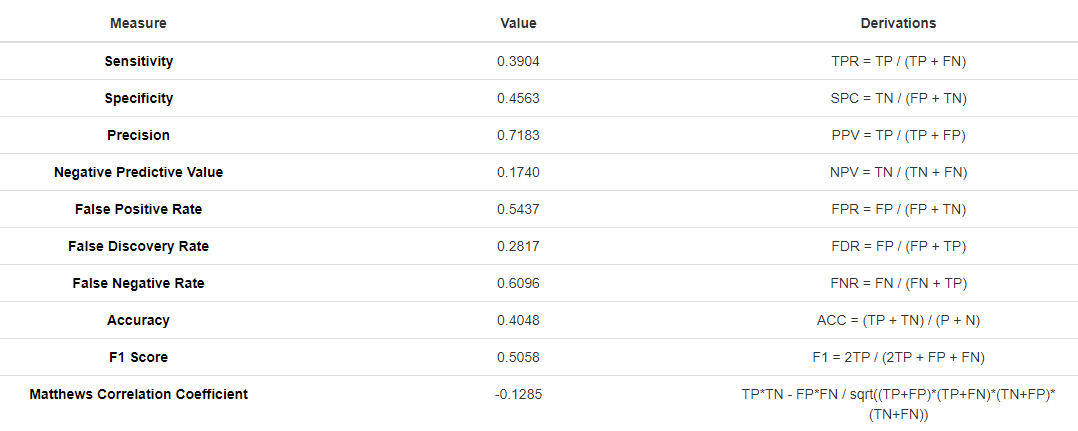

# Supervised Learning

Pytorch Imagefolder for loading data

In [ ]:
dataset_path = '/content/drive/MyDrive/PRML Project/covid 19/Extensive COVID-19 X-Ray and CT Chest Images Dataset.zip (Unzipped Files)/COVID-19 Dataset.zip (Unzipped Files)/COVID-19 Dataset/X-ray'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
from torchvision.transforms.transforms import RandomHorizontalFlip
dataset_transforms = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

In [ ]:
dataset = torchvision.datasets.ImageFolder(root = dataset_path, transform = dataset_transforms)

In [ ]:
dataset[0]

(tensor([[[0.6706, 0.4824, 0.4627,  ..., 0.4706, 0.4588, 0.7451],
          [0.4275, 0.0196, 0.0275,  ..., 0.0118, 0.0157, 0.5647],
          [0.4118, 0.0275, 0.0157,  ..., 0.0118, 0.0196, 0.5725],
          ...,
          [0.4863, 0.1451, 0.1765,  ..., 0.1608, 0.1137, 0.6118],
          [0.4863, 0.1490, 0.1804,  ..., 0.1608, 0.1059, 0.6039],
          [0.6784, 0.4627, 0.4863,  ..., 0.4667, 0.4353, 0.7529]],
 
         [[0.6706, 0.4824, 0.4627,  ..., 0.4706, 0.4588, 0.7451],
          [0.4275, 0.0196, 0.0275,  ..., 0.0118, 0.0157, 0.5647],
          [0.4118, 0.0275, 0.0157,  ..., 0.0118, 0.0196, 0.5725],
          ...,
          [0.4863, 0.1451, 0.1765,  ..., 0.1608, 0.1137, 0.6118],
          [0.4863, 0.1490, 0.1804,  ..., 0.1608, 0.1059, 0.6039],
          [0.6784, 0.4627, 0.4863,  ..., 0.4667, 0.4353, 0.7529]],
 
         [[0.6706, 0.4824, 0.4627,  ..., 0.4706, 0.4588, 0.7451],
          [0.4275, 0.0196, 0.0275,  ..., 0.0118, 0.0157, 0.5647],
          [0.4118, 0.0275, 0.0157,  ...,

In [ ]:
dataset[0][0].shape

torch.Size([3, 224, 224])

In [ ]:
torchvision.transforms.Grayscale()(dataset[0][0]).shape

torch.Size([1, 224, 224])

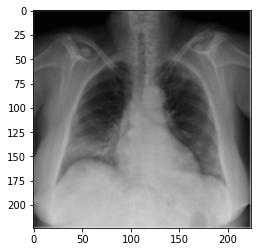

In [ ]:
plt.imshow(dataset[0][0].permute(1, 2, 0), interpolation='bicubic')

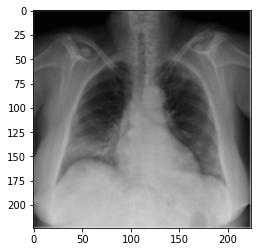

In [ ]:
plt.imshow(transforms.ToPILImage()(dataset[0][0]), interpolation="bicubic")

In [ ]:
len(dataset)

9537

In [ ]:
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size,test_size])

In [ ]:
def split_XY(dataset):
    l = []
    a = torch.Tensor(len(dataset), 1, 224, 224)
    for i, (image, label) in enumerate(dataset):
        # a[i, :, :, :] = image
        a[i, :, :, :] = torchvision.transforms.Grayscale()(image)
        l.append(label)
    return a, torch.Tensor(l)
X_train, y_train = split_XY(train_dataset)
X_test, y_test = split_XY(test_dataset)

In [ ]:
X_train.is_cuda

False

In [ ]:
cuda = torch.device('cuda')

In [ ]:
X_train.shape, y_train.shape

(torch.Size([6675, 1, 224, 224]), torch.Size([6675]))

In [ ]:
X_test.shape, y_test.shape

(torch.Size([2862, 1, 224, 224]), torch.Size([2862]))

In [ ]:
X_train = torch.Tensor(X_train).to(cuda)
X_test = torch.Tensor(X_test).to(cuda)

In [ ]:
X_train.is_cuda

True

In [ ]:
X_train.shape[2], X_test.shape[2]

(224, 224)

In [ ]:
X_train1 = torch.reshape(X_train, (X_train.shape[0], X_train.shape[2]*X_train.shape[3]))
X_test1 = torch.reshape(X_test, (X_test.shape[0], X_test.shape[2]*X_test.shape[3]))

In [ ]:
X_train1.shape, X_test1.shape

(torch.Size([6675, 50176]), torch.Size([2862, 50176]))

In [ ]:
y_train1 = y_train.to(cuda)
y_test1 = y_test.to(cuda)

In [ ]:
X_train_np = X_train1.cpu().detach().numpy()
y_train_np = y_train1.cpu().detach().numpy()
X_test_np = X_test1.cpu().detach().numpy()
y_test_np = y_test1.cpu().detach().numpy()

In [ ]:
X_train_np.shape

(6675, 50176)

DTC

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
clf = DecisionTreeClassifier().fit(X_train_np, y_train_np)
y_pred = clf.predict(X_test_np)
y_pred_proba = clf.predict_proba(X_test_np)
print(classification_report(y_test_np, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75      1235
         1.0       0.80      0.85      0.82      1627

    accuracy                           0.79      2862
   macro avg       0.79      0.78      0.79      2862
weighted avg       0.79      0.79      0.79      2862



[Text(0.5, 1.0, 'CM for DTC')]

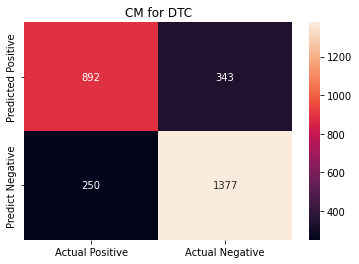

In [ ]:
cm_matrix0 = pd.DataFrame(data = confusion_matrix(pd.Series(y_test_np, dtype=int), pd.Series(y_pred)), columns = ['Actual Positive', 'Actual Negative'], index = ['Predicted Positive', 'Predict Negative'])
sns.heatmap(cm_matrix0, annot=True, fmt='d').set(title='CM for DTC')

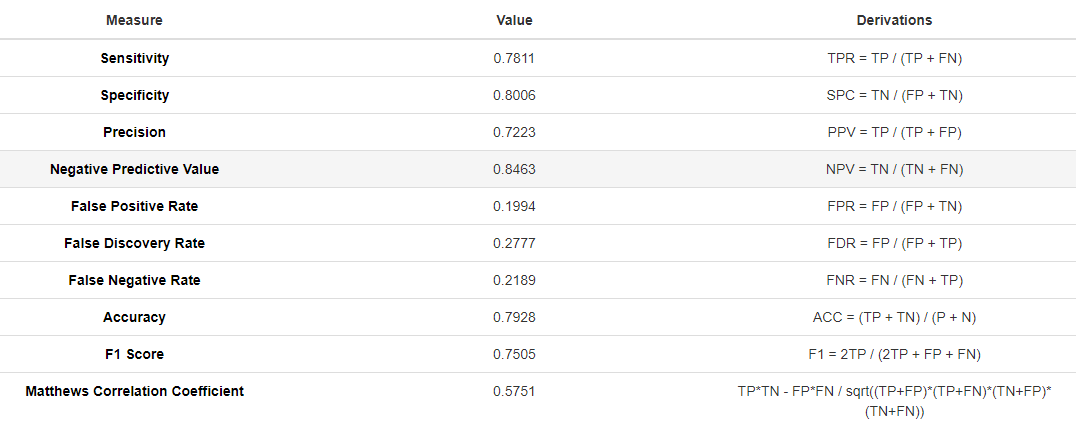

In [ ]:
print(roc_auc_score(y_test_np, y_pred_proba[:,1]))

0.7842212263200197


In [ ]:
print(roc_auc_score(y_test_np, y_pred))

0.7843050844927077


RFC

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(X_train_np, y_train_np)
y_pred_rfc = clf.predict(X_test_np)
y_pred_proba_rfc = clf.predict_proba(X_test_np)
print(classification_report(y_test_np, y_pred_rfc))

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83      1235
         1.0       0.86      0.89      0.88      1627

    accuracy                           0.86      2862
   macro avg       0.86      0.85      0.86      2862
weighted avg       0.86      0.86      0.86      2862



In [ ]:
print(roc_auc_score(y_test_np, y_pred_proba_rfc[:,1]))

0.9347725253751845


In [ ]:
print(roc_auc_score(y_test_np, y_pred_rfc))

0.8532977164200275


[Text(0.5, 1.0, 'CM for RFC')]

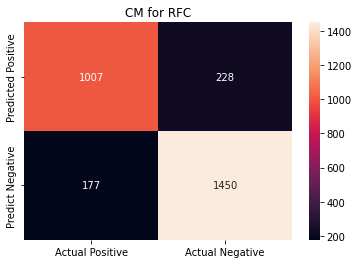

In [ ]:
cm_matrix1 = pd.DataFrame(data = confusion_matrix(pd.Series(y_test_np, dtype=int), pd.Series(y_pred_rfc)), columns = ['Actual Positive', 'Actual Negative'], index = ['Predicted Positive', 'Predict Negative'])
sns.heatmap(cm_matrix1, annot=True, fmt='d').set(title='CM for RFC')

Evaluation metrics:

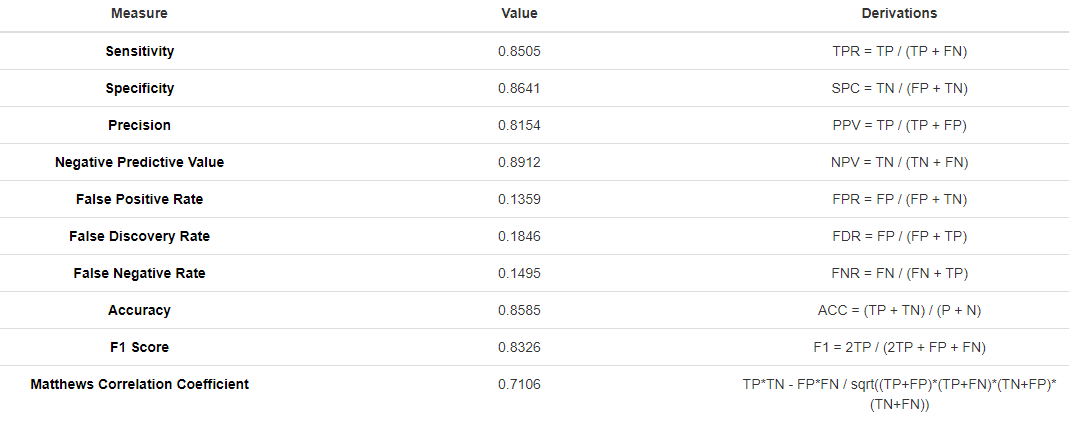

Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(X_train_np, y_train_np)
y_pred_gnb = clf.predict(X_test_np)
y_pred_proba_gnb = clf.predict_proba(X_test_np)
print(classification_report(y_test_np, y_pred_gnb))

              precision    recall  f1-score   support

         0.0       0.65      0.62      0.64      1235
         1.0       0.72      0.75      0.74      1627

    accuracy                           0.69      2862
   macro avg       0.69      0.69      0.69      2862
weighted avg       0.69      0.69      0.69      2862



[Text(0.5, 1.0, 'CM for GNB')]

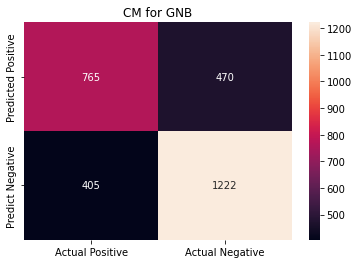

In [ ]:
cm_matrix1 = pd.DataFrame(data = confusion_matrix(pd.Series(y_test_np, dtype=int), pd.Series(y_pred_gnb)), columns = ['Actual Positive', 'Actual Negative'], index = ['Predicted Positive', 'Predict Negative'])
sns.heatmap(cm_matrix1, annot=True, fmt='d').set(title='CM for GNB')

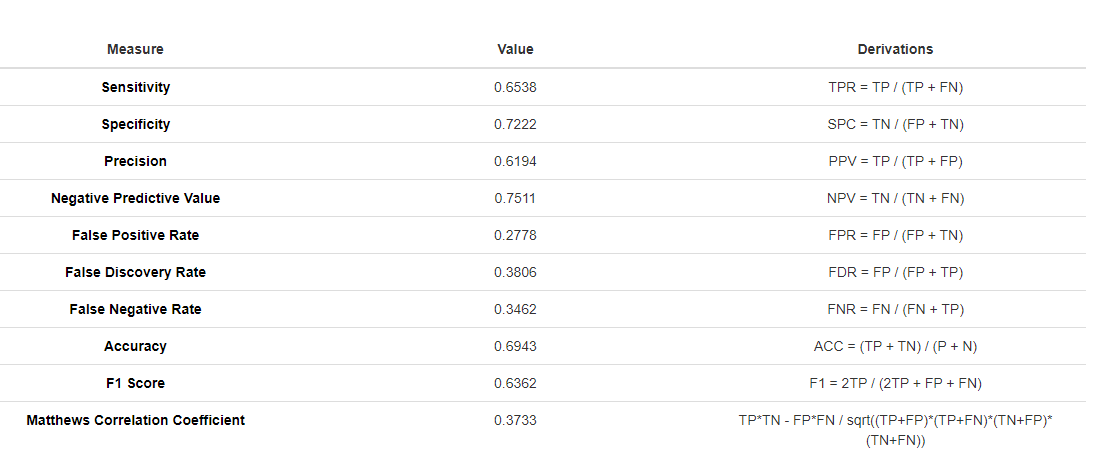

In [ ]:
print(roc_auc_score(y_test_np, y_pred_proba_gnb[:,1]))

0.6878146858802245


# Deep Learning Method

Importing Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
os.listdir('/content/drive/MyDrive/PRML Project/covid 19/Extensive COVID-19 X-Ray and CT Chest Images Dataset.zip (Unzipped Files)/COVID-19 Dataset.zip (Unzipped Files)/COVID-19 Dataset/X-ray')

['Non-COVID', 'COVID']

In [ ]:
len(os.listdir('/content/drive/MyDrive/PRML Project/covid 19/Extensive COVID-19 X-Ray and CT Chest Images Dataset.zip (Unzipped Files)/COVID-19 Dataset.zip (Unzipped Files)/COVID-19 Dataset/X-ray/COVID'))

4044

In [ ]:
len(os.listdir('/content/drive/MyDrive/PRML Project/covid 19/Extensive COVID-19 X-Ray and CT Chest Images Dataset.zip (Unzipped Files)/COVID-19 Dataset.zip (Unzipped Files)/COVID-19 Dataset/X-ray/Non-COVID'))

5500

In [ ]:
dataset_path = '/content/drive/MyDrive/PRML Project/covid 19/Extensive COVID-19 X-Ray and CT Chest Images Dataset.zip (Unzipped Files)/COVID-19 Dataset.zip (Unzipped Files)/COVID-19 Dataset/X-ray'

In [ ]:
dataset_transforms = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

In [ ]:
def get_mean_and_std(loader):
  mean = 0.
  std = 0.
  total_images_count = 0
  for images, _ in loader:
    image_count_in_a_batch = images.size(0)
    images = images.view(image_count_in_a_batch, images.size(1), -1)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)
    total_images_count += image_count_in_a_batch
  mean /= total_images_count
  std /= total_images_count

  return mean, std 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
os.listdir('/content/drive/MyDrive/PRML Project/covid 19/Extensive COVID-19 X-Ray and CT Chest Images Dataset.zip (Unzipped Files)/COVID-19 Dataset.zip (Unzipped Files)/COVID-19 Dataset/X-ray')

['Non-COVID', 'COVID']

In [ ]:
len(os.listdir('/content/drive/MyDrive/PRML Project/covid 19/Extensive COVID-19 X-Ray and CT Chest Images Dataset.zip (Unzipped Files)/COVID-19 Dataset.zip (Unzipped Files)/COVID-19 Dataset/X-ray/COVID'))

4044

In [ ]:
len(os.listdir('/content/drive/MyDrive/PRML Project/covid 19/Extensive COVID-19 X-Ray and CT Chest Images Dataset.zip (Unzipped Files)/COVID-19 Dataset.zip (Unzipped Files)/COVID-19 Dataset/X-ray/Non-COVID'))

5500

In [ ]:
dataset_path = '/content/drive/MyDrive/PRML Project/covid 19/Extensive COVID-19 X-Ray and CT Chest Images Dataset.zip (Unzipped Files)/COVID-19 Dataset.zip (Unzipped Files)/COVID-19 Dataset/X-ray'

In [ ]:
dataset_transforms = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

In [ ]:
def get_mean_and_std(loader):
  mean = 0.
  std = 0.
  total_images_count = 0
  for images, _ in loader:
    image_count_in_a_batch = images.size(0)
    images = images.view(image_count_in_a_batch, images.size(1), -1)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)
    total_images_count += image_count_in_a_batch
  mean /= total_images_count
  std /= total_images_count

  return mean, std 

DataLoader

In [ ]:
mean = [0.4867, 0.4870, 0.4872]
std = [0.2273, 0.2273, 0.2274]
from torchvision.transforms.transforms import RandomHorizontalFlip
dataset_transforms2 = transforms.Compose([
                                          transforms.Resize((224,224)), 
                                          transforms.RandomHorizontalFlip(),
                                          transforms.RandomRotation(10),
                                          transforms.ToTensor(),
                                          transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
                                        ])

In [ ]:
dataset = torchvision.datasets.ImageFolder(root = dataset_path, transform = dataset_transforms2)

In [ ]:
len(dataset)

9537

In [ ]:
train_size = int(0.7 * len(dataset))
validation_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - validation_size
train_dataset, validation_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size,validation_size,test_size])

In [ ]:
dataset_loader = torch.utils.data.DataLoader(dataset = dataset, batch_size = 4, shuffle = True)

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 4, shuffle = True)
valid_loader = torch.utils.data.DataLoader(dataset = validation_dataset, batch_size = 4)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = 4)

In [ ]:
# get_mean_and_std(dataset_loader)

In [ ]:
def show_transformed_images(dataset):
  loader = torch.utils.data.DataLoader(dataset, batch_size = 6, shuffle = True)
  batch = next(iter(loader))
  images, labels = batch

  grid = torchvision.utils.make_grid(images, nrow = 3)
  plt.figure(figsize = (11,11))
  plt.imshow(np.transpose(grid, (1,2,0)))
  print("labels: ", labels)

In [ ]:
# show_transformed_images(dataset)

In [ ]:
# show_transformed_images(train_dataset)

In [ ]:
# show_transformed_images(validation_dataset)

In [ ]:
def set_device():
  if torch.cuda.is_available():
    dev = "cuda:0"
  else:
    dev = "cpu"
  return torch.device(dev)

In [ ]:
# DEVICE = set_device()

In [ ]:
# DEVICE

In [ ]:
!nvidia-smi

Wed Apr 13 19:25:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
mean = [0.4867, 0.4870, 0.4872]
std = [0.2273, 0.2273, 0.2274]
from torchvision.transforms.transforms import RandomHorizontalFlip
dataset_transforms2 = transforms.Compose([
                                          transforms.Resize((224,224)), 
                                          transforms.RandomHorizontalFlip(),
                                          transforms.RandomRotation(10),
                                          transforms.ToTensor(),
                                          transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
                                        ])

In [ ]:
dataset = torchvision.datasets.ImageFolder(root = dataset_path, transform = dataset_transforms2)

In [ ]:
len(dataset)

9537

In [ ]:
train_size = int(0.7 * len(dataset))
validation_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - validation_size
train_dataset, validation_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size,validation_size,test_size])

In [ ]:
dataset_loader = torch.utils.data.DataLoader(dataset = dataset, batch_size = 8, shuffle = True)

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 8, shuffle = True)
valid_loader = torch.utils.data.DataLoader(dataset = validation_dataset, batch_size = 8)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = 8)

In [ ]:
# get_mean_and_std(dataset_loader)

In [ ]:
def show_transformed_images(dataset):
  loader = torch.utils.data.DataLoader(dataset, batch_size = 6, shuffle = True)
  batch = next(iter(loader))
  images, labels = batch

  grid = torchvision.utils.make_grid(images, nrow = 3)
  plt.figure(figsize = (11,11))
  plt.imshow(np.transpose(grid, (1,2,0)))
  print("labels: ", labels)

In [ ]:
# show_transformed_images(dataset)

In [ ]:
# show_transformed_images(train_dataset)

In [ ]:
# show_transformed_images(validation_dataset)

In [ ]:
def set_device():
  if torch.cuda.is_available():
    dev = "cuda:0"
  else:
    dev = "cpu"
  return torch.device(dev)

In [ ]:
# DEVICE = set_device()

In [ ]:
# DEVICE

In [ ]:
!nvidia-smi

Sat Apr 30 11:29:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Helper Functions

In [ ]:
# imports from installed libraries
import os
import numpy as np
import random
import torch
from distutils.version import LooseVersion as Version
from itertools import product

def set_all_seeds(seed):
    os.environ["PL_GLOBAL_SEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)


def set_deterministic(use_tensorcores=False):
    if torch.cuda.is_available():
        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True

    if torch.__version__ <= Version("1.7"):
        torch.set_deterministic(True)
    else:
        torch.use_deterministic_algorithms(True)
        
        # The following are set to True by default and allow cards
        # like the Ampere and newer to utilize tensorcores for
        # convolutions and matrix multiplications, which can result
        # in a significant speed-up. However, results may differ compared
        # to card how don't use mixed precision via tensor cores.
        torch.backends.cuda.matmul.allow_tf32 = use_tensorcores
        torch.backends.cudnn.allow_tf32 = use_tensorcores


def compute_accuracy(model, data_loader, device):

    with torch.no_grad():

        correct_pred, num_examples = 0, 0

        for i, (features, targets) in enumerate(data_loader):

            features = features.to(device)
            targets = targets.float().to(device)

            logits = model(features)
            _, predicted_labels = torch.max(logits, 1)

            num_examples += targets.size(0)
            correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100


def compute_confusion_matrix(model, data_loader, device):

    all_targets, all_predictions = [], []
    with torch.no_grad():

        for i, (features, targets) in enumerate(data_loader):

            features = features.to(device)
            targets = targets
            logits = model(features)
            _, predicted_labels = torch.max(logits, 1)
            all_targets.extend(targets.to('cpu'))
            all_predictions.extend(predicted_labels.to('cpu'))

    all_predictions = all_predictions
    all_predictions = np.array(all_predictions)
    all_targets = np.array(all_targets)
        
    class_labels = np.unique(np.concatenate((all_targets, all_predictions)))
    if class_labels.shape[0] == 1:
        if class_labels[0] != 0:
            class_labels = np.array([0, class_labels[0]])
        else:
            class_labels = np.array([class_labels[0], 1])
    n_labels = class_labels.shape[0]
    lst = []
    z = list(zip(all_targets, all_predictions))
    for combi in product(class_labels, repeat=2):
        lst.append(z.count(combi))
    mat = np.asarray(lst)[:, None].reshape(n_labels, n_labels)
    return mat

Train

In [ ]:
import time
import torch

def train_model(model, num_epochs, train_loader,
                valid_loader, test_loader, optimizer,
                device, logging_interval=50,
                scheduler=None,
                scheduler_on='valid_acc'):

    start_time = time.time()
    minibatch_loss_list, train_acc_list, valid_acc_list = [], [], []
    
    best_acc = 0
    for epoch in range(num_epochs):

        model.train()
        for batch_idx, (features, targets) in enumerate(train_loader):

            features = features.to(device)
            targets = targets.to(device)

            # ## FORWARD AND BACK PROP
            logits = model(features)
            loss = torch.nn.functional.cross_entropy(logits, targets)
            optimizer.zero_grad()

            loss.backward()

            # ## UPDATE MODEL PARAMETERS
            optimizer.step()

            # ## LOGGING
            minibatch_loss_list.append(loss.item())
            if not batch_idx % logging_interval:
                print(f'Epoch: {epoch+1:03d}/{num_epochs:03d} '
                      f'| Batch {batch_idx:04d}/{len(train_loader):04d} '
                      f'| Loss: {loss:.4f}')

        model.eval()
        with torch.no_grad():  # save memory during inference
            train_acc = compute_accuracy(model, train_loader, device=device)
            valid_acc = compute_accuracy(model, valid_loader, device=device)
            print(f'Epoch: {epoch+1:03d}/{num_epochs:03d} '
                  f'| Train: {train_acc :.2f}% '
                  f'| Validation: {valid_acc :.2f}%')
            train_acc_list.append(train_acc.item())
            valid_acc_list.append(valid_acc.item())

        if(valid_acc.item() > best_acc):
          best_acc = valid_acc.item()
          torch.save(model.state_dict(), f'/content/drive/MyDrive/PRML Project/covid 19/Weights_full_training/vgg19_full_30_04_{valid_acc.item()}.pt')

        elapsed = (time.time() - start_time)/60
        print(f'Time elapsed: {elapsed:.2f} min')
        
        if scheduler is not None:

            if scheduler_on == 'valid_acc':
                scheduler.step(valid_acc_list[-1])
            elif scheduler_on == 'minibatch_loss':
                scheduler.step(minibatch_loss_list[-1])
            else:
                raise ValueError(f'Invalid `scheduler_on` choice.')
        

    elapsed = (time.time() - start_time)/60
    print(f'Total Training Time: {elapsed:.2f} min')

    test_acc = compute_accuracy(model, test_loader, device=device)
    print(f'Test accuracy {test_acc :.2f}%')

    return minibatch_loss_list, train_acc_list, valid_acc_list

Accuracy Calculation and Plotting Functions

In [ ]:
# imports from installed libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import torch


def plot_training_loss(minibatch_loss_list, num_epochs, iter_per_epoch,
                       results_dir=None, averaging_iterations=100):

    plt.figure()
    ax1 = plt.subplot(1, 1, 1)
    ax1.plot(range(len(minibatch_loss_list)),
             (minibatch_loss_list), label='Minibatch Loss')

    if len(minibatch_loss_list) > 1000:
        ax1.set_ylim([
            0, np.max(minibatch_loss_list[1000:])*1.5
            ])
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Loss')

    ax1.plot(np.convolve(minibatch_loss_list,
                         np.ones(averaging_iterations,)/averaging_iterations,
                         mode='valid'),
             label='Running Average')
    ax1.legend()

    ###################
    # Set scond x-axis
    ax2 = ax1.twiny()
    newlabel = list(range(num_epochs+1))

    newpos = [e*iter_per_epoch for e in newlabel]

    ax2.set_xticks(newpos[::10])
    ax2.set_xticklabels(newlabel[::10])

    ax2.xaxis.set_ticks_position('bottom')
    ax2.xaxis.set_label_position('bottom')
    ax2.spines['bottom'].set_position(('outward', 45))
    ax2.set_xlabel('Epochs')
    ax2.set_xlim(ax1.get_xlim())
    ###################

    plt.tight_layout()

    if results_dir is not None:
        image_path = os.path.join(results_dir, 'plot_training_loss.pdf')
        plt.savefig(image_path)


def plot_accuracy(train_acc_list, valid_acc_list, results_dir):

    num_epochs = len(train_acc_list)

    plt.plot(np.arange(1, num_epochs+1),
             train_acc_list, label='Training')
    plt.plot(np.arange(1, num_epochs+1),
             valid_acc_list, label='Validation')

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()

    if results_dir is not None:
        image_path = os.path.join(
            results_dir, 'plot_acc_training_validation.pdf')
        plt.savefig(image_path)


def show_examples(model, data_loader, unnormalizer=None, class_dict=None):
    
        
    for batch_idx, (features, targets) in enumerate(data_loader):

        with torch.no_grad():
            features = features
            targets = targets
            logits = model(features)
            predictions = torch.argmax(logits, dim=1)
        break

    fig, axes = plt.subplots(nrows=1, ncols=5,
                             sharex=True, sharey=True)
    
    if unnormalizer is not None:
        for idx in range(features.shape[0]):
            features[idx] = unnormalizer(features[idx])
    nhwc_img = np.transpose(features, axes=(0, 2, 3, 1))
    
    if nhwc_img.shape[-1] == 1:
        nhw_img = np.squeeze(nhwc_img.numpy(), axis=3)

        for idx, ax in enumerate(axes.ravel()):
            ax.imshow(nhw_img[idx], cmap='binary')
            if class_dict is not None:
                ax.title.set_text(f'P: {class_dict[predictions[idx].item()]}'
                                  f'\nT: {class_dict[targets[idx].item()]}')
            else:
                ax.title.set_text(f'P: {predictions[idx]} | T: {targets[idx]}')
            ax.axison = False

    else:

        for idx, ax in enumerate(axes.ravel()):
            ax.imshow(nhwc_img[idx])
            if class_dict is not None:
                ax.title.set_text(f'P: {class_dict[predictions[idx].item()]}'
                                  f'\nT: {class_dict[targets[idx].item()]}')
            else:
                ax.title.set_text(f'P: {predictions[idx]} | T: {targets[idx]}')
            ax.axison = False
    plt.tight_layout()
    plt.show()


def plot_confusion_matrix(conf_mat,
                          hide_spines=False,
                          hide_ticks=False,
                          figsize=None,
                          cmap=None,
                          colorbar=False,
                          show_absolute=True,
                          show_normed=False,
                          class_names=None):

    if not (show_absolute or show_normed):
        raise AssertionError('Both show_absolute and show_normed are False')
    if class_names is not None and len(class_names) != len(conf_mat):
        raise AssertionError('len(class_names) should be equal to number of'
                             'classes in the dataset')

    total_samples = conf_mat.sum(axis=1)[:, np.newaxis]
    normed_conf_mat = conf_mat.astype('float') / total_samples

    fig, ax = plt.subplots(figsize=figsize)
    ax.grid(False)
    if cmap is None:
        cmap = plt.cm.Blues

    if figsize is None:
        figsize = (len(conf_mat)*1.25, len(conf_mat)*1.25)

    if show_normed:
        matshow = ax.matshow(normed_conf_mat, cmap=cmap)
    else:
        matshow = ax.matshow(conf_mat, cmap=cmap)

    if colorbar:
        fig.colorbar(matshow)

    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            cell_text = ""
            if show_absolute:
                cell_text += format(conf_mat[i, j], 'd')
                if show_normed:
                    cell_text += "\n" + '('
                    cell_text += format(normed_conf_mat[i, j], '.2f') + ')'
            else:
                cell_text += format(normed_conf_mat[i, j], '.2f')
            ax.text(x=j,
                    y=i,
                    s=cell_text,
                    va='center',
                    ha='center',
                    color="white" if normed_conf_mat[i, j] > 0.5 else "black")
    
    if class_names is not None:
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names, rotation=90)
        plt.yticks(tick_marks, class_names)
        
    if hide_spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    if hide_ticks:
        ax.axes.get_yaxis().set_ticks([])
        ax.axes.get_xaxis().set_ticks([])

    plt.xlabel('predicted label')
    plt.ylabel('true label')
    return fig, ax

Unnormalizing Function

In [ ]:
import torch
from torch.utils.data import sampler
from torchvision import datasets
from torch.utils.data import DataLoader
from torch.utils.data import SubsetRandomSampler
from torchvision import transforms


class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        """
        Parameters:
        ------------
        tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        
        Returns:
        ------------
        Tensor: Normalized image.
        """
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
        return tensor

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
RANDOM_SEED = 123
BATCH_SIZE = 4
NUM_EPOCHS = 3
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
set_all_seeds(RANDOM_SEED)
#set_deterministic()

In [ ]:
# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Image batch dimensions: torch.Size([4, 3, 224, 224])
Image label dimensions: torch.Size([4])
Class labels of 10 examples: tensor([1, 1, 0, 1])


# Resnet 18 Model - Full Training From Scratch

In [ ]:
model = torchvision.models.resnet18(pretrained=False)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
model.fc = torch.nn.Linear(512, 2)

Epoch: 001/003 | Batch 0000/1669 | Loss: 0.7846
Epoch: 001/003 | Batch 0100/1669 | Loss: 0.9563
Epoch: 001/003 | Batch 0200/1669 | Loss: 0.4211
Epoch: 001/003 | Batch 0300/1669 | Loss: 0.6021
Epoch: 001/003 | Batch 0400/1669 | Loss: 0.7114
Epoch: 001/003 | Batch 0500/1669 | Loss: 1.1155
Epoch: 001/003 | Batch 0600/1669 | Loss: 1.0495
Epoch: 001/003 | Batch 0700/1669 | Loss: 0.3284
Epoch: 001/003 | Batch 0800/1669 | Loss: 0.3062
Epoch: 001/003 | Batch 0900/1669 | Loss: 0.1210
Epoch: 001/003 | Batch 1000/1669 | Loss: 0.2866
Epoch: 001/003 | Batch 1100/1669 | Loss: 0.4384
Epoch: 001/003 | Batch 1200/1669 | Loss: 0.6122
Epoch: 001/003 | Batch 1300/1669 | Loss: 0.4679
Epoch: 001/003 | Batch 1400/1669 | Loss: 0.2130
Epoch: 001/003 | Batch 1500/1669 | Loss: 0.2734
Epoch: 001/003 | Batch 1600/1669 | Loss: 0.6213
Epoch: 001/003 | Train: 73.38% | Validation: 73.83%
Time elapsed: 44.99 min
Epoch: 002/003 | Batch 0000/1669 | Loss: 0.3475
Epoch: 002/003 | Batch 0100/1669 | Loss: 0.2410
Epoch: 002/0

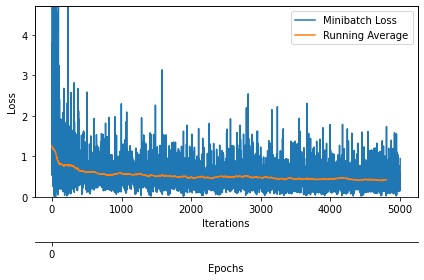

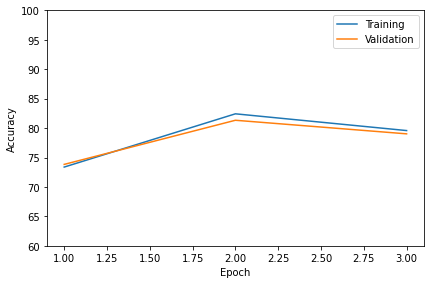

In [ ]:
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

Number of Iterations = 3

Resnet 18 Epochwise Loss and Running Average
<br>
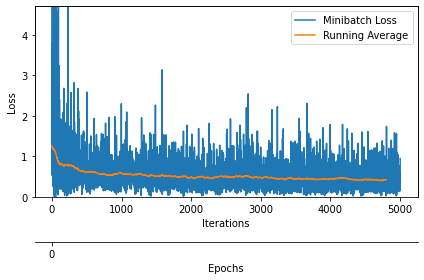

Resnet 18 Epochwise Training and Validation Accuracy 
<br>
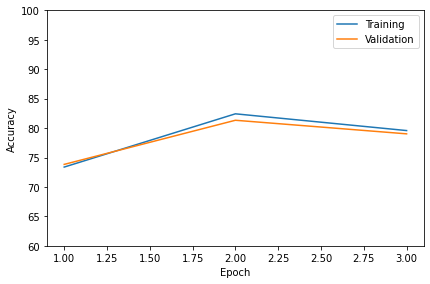

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/PRML Project/covid 19/weights/m1/resnet18_13_04_only_linear_layers.pth')

In [ ]:
model.cpu()
unnormalizer = UnNormalize(mean, std)
class_dict = {0: 'Covid',
              1: 'Non-Covid'}
show_examples(model=model, data_loader=test_loader, unnormalizer=unnormalizer, class_dict=class_dict)

Resnet 18 Predictions

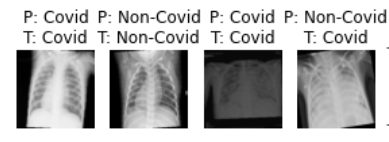

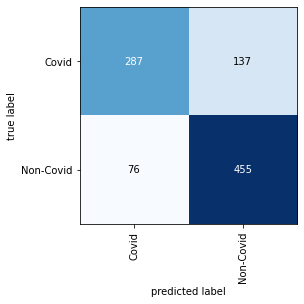

In [ ]:
mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()

Evaluation Metrics:

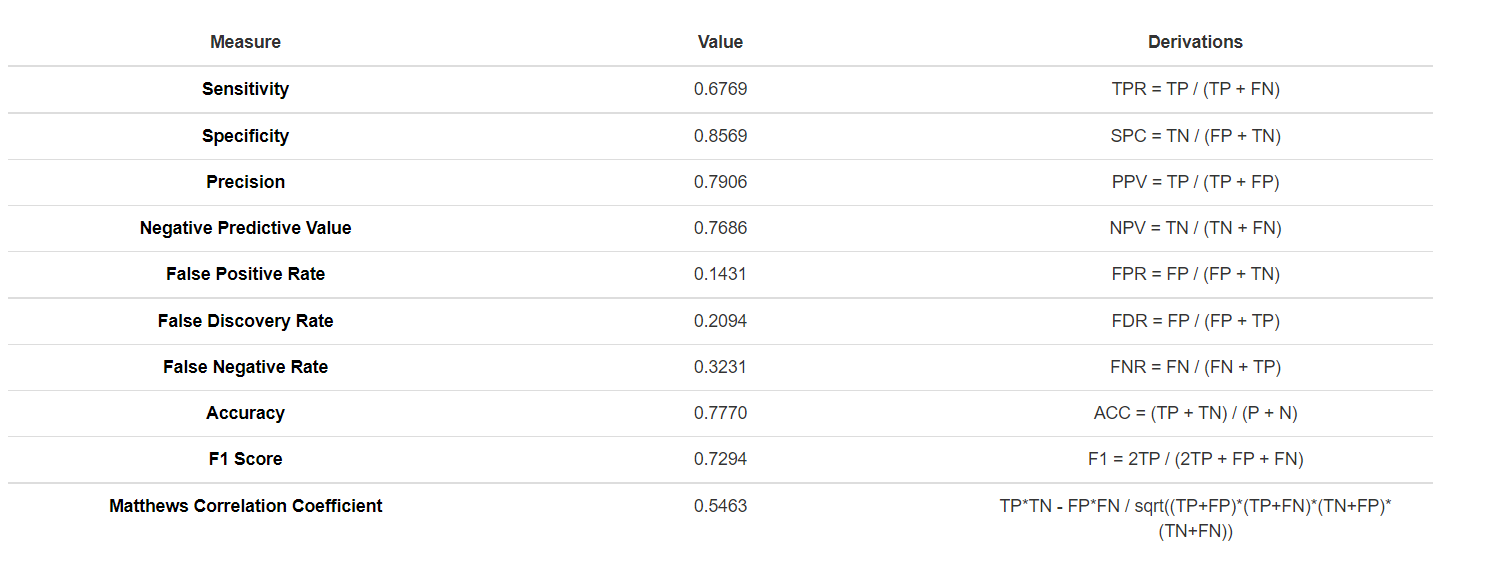

# Resnet50 Model - Full Training From Scratch

In [ ]:
model = torchvision.models.resnext50_32x4d(pretrained=False)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [ ]:
model.fc = torch.nn.Linear(2048, 2)

Epoch: 001/003 | Batch 0000/1669 | Loss: 0.4915
Epoch: 001/003 | Batch 0100/1669 | Loss: 0.6267
Epoch: 001/003 | Batch 0200/1669 | Loss: 1.3345
Epoch: 001/003 | Batch 0300/1669 | Loss: 0.3553
Epoch: 001/003 | Batch 0400/1669 | Loss: 0.5957
Epoch: 001/003 | Batch 0500/1669 | Loss: 0.3463
Epoch: 001/003 | Batch 0600/1669 | Loss: 0.1973
Epoch: 001/003 | Batch 0700/1669 | Loss: 0.3403
Epoch: 001/003 | Batch 0800/1669 | Loss: 0.5508
Epoch: 001/003 | Batch 0900/1669 | Loss: 1.5409
Epoch: 001/003 | Batch 1000/1669 | Loss: 0.4507
Epoch: 001/003 | Batch 1100/1669 | Loss: 0.1885
Epoch: 001/003 | Batch 1200/1669 | Loss: 0.2126
Epoch: 001/003 | Batch 1300/1669 | Loss: 0.8210
Epoch: 001/003 | Batch 1400/1669 | Loss: 1.0684
Epoch: 001/003 | Batch 1500/1669 | Loss: 0.4529
Epoch: 001/003 | Batch 1600/1669 | Loss: 0.5593
Epoch: 001/003 | Train: 71.10% | Validation: 69.01%
Time elapsed: 36.09 min
Epoch: 002/003 | Batch 0000/1669 | Loss: 1.3045
Epoch: 002/003 | Batch 0100/1669 | Loss: 0.5813
Epoch: 002/0

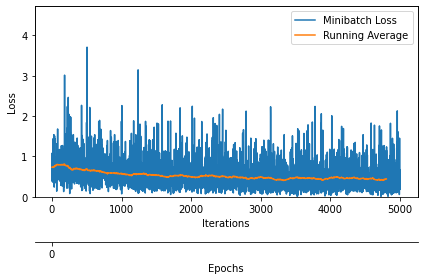

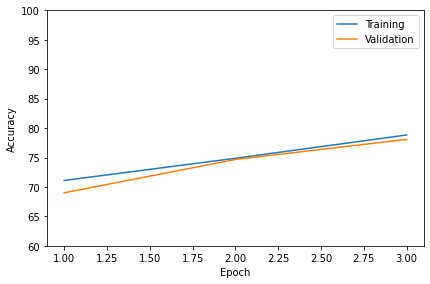

In [ ]:
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

Resnet 18 Epochwise Loss and Running Average
<br>
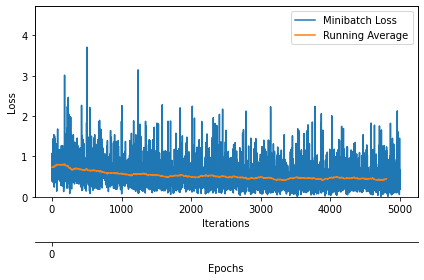

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/PRML Project/covid 19/weights/m1/resnext50_32x4d_13_04_only_linear_layers.pth')

Resnet 50 Epochwise Training Accuracy and Testing Accuracy
<br>
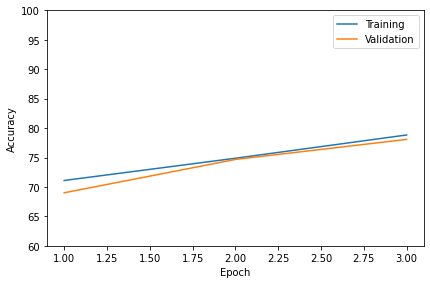

In [ ]:
model.cpu()
unnormalizer = UnNormalize(mean, std)
class_dict = {0: 'Covid',
              1: 'Non-Covid'}
show_examples(model=model, data_loader=test_loader, unnormalizer=unnormalizer, class_dict=class_dict)

Resnet50 Predictions
<br>
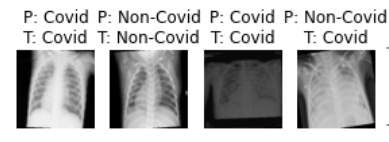

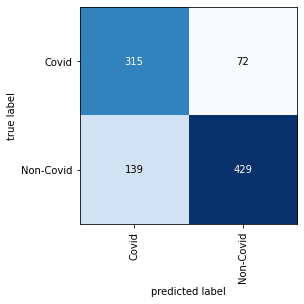

In [ ]:
mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()

Evaluation Metrics:

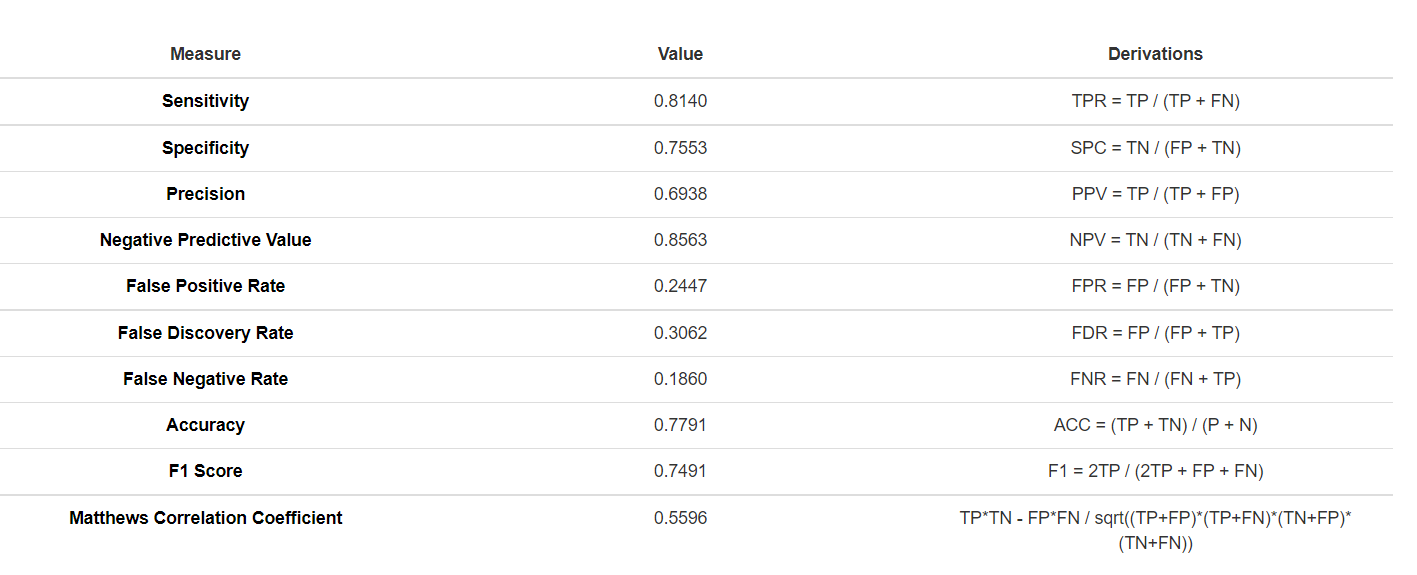

# VGG16 Model - Freezed the Feature Extracting Convolution layers and Training on only linear classifier layers

In [ ]:
model = torchvision.models.vgg16(pretrained=True)
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
model.classifier[0].requires_grad = True
model.classifier[3].requires_grad = True

In [ ]:
model.classifier[6] = torch.nn.Linear(4096, 2)

Epoch: 001/003 | Batch 0000/1669 | Loss: 0.8054
Epoch: 001/003 | Batch 0100/1669 | Loss: 0.0042
Epoch: 001/003 | Batch 0200/1669 | Loss: 0.0000
Epoch: 001/003 | Batch 0300/1669 | Loss: 9.2322
Epoch: 001/003 | Batch 0400/1669 | Loss: 0.0000
Epoch: 001/003 | Batch 0500/1669 | Loss: 10.6495
Epoch: 001/003 | Batch 0600/1669 | Loss: 0.0000
Epoch: 001/003 | Batch 0700/1669 | Loss: 21.7751
Epoch: 001/003 | Batch 0800/1669 | Loss: 15.4940
Epoch: 001/003 | Batch 0900/1669 | Loss: 28.0586
Epoch: 001/003 | Batch 1000/1669 | Loss: 0.0003
Epoch: 001/003 | Batch 1100/1669 | Loss: 0.0000
Epoch: 001/003 | Batch 1200/1669 | Loss: 42.9704
Epoch: 001/003 | Batch 1300/1669 | Loss: 0.2778
Epoch: 001/003 | Batch 1400/1669 | Loss: 50.5112
Epoch: 001/003 | Batch 1500/1669 | Loss: 0.7317
Epoch: 001/003 | Batch 1600/1669 | Loss: 30.3315
Epoch: 001/003 | Train: 73.33% | Validation: 73.68%
Time elapsed: 45.50 min
Epoch: 002/003 | Batch 0000/1669 | Loss: 76.2419
Epoch: 002/003 | Batch 0100/1669 | Loss: 29.6079
Epo

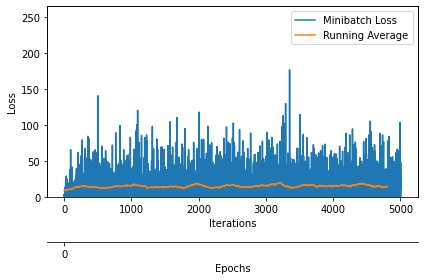

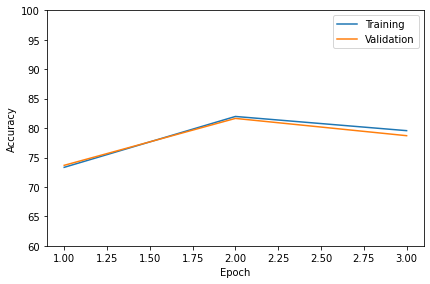

In [ ]:
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

VGG16 Epochwise Minibatch Loss and Running Average Loss
<br>
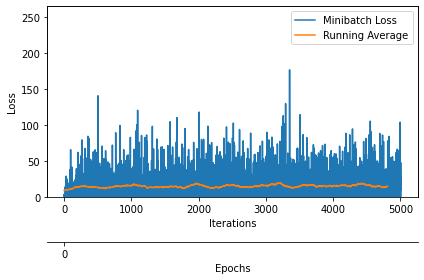  

VGG16 Epochwise Training and Validation Accuracy
<br>
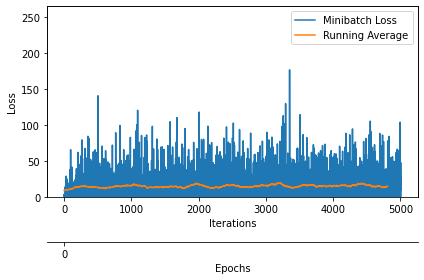

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/PRML Project/covid 19/weights/m1/vgg16_13_04_only_linear_layers.pth')

In [ ]:
model.cpu()
unnormalizer = UnNormalize(mean, std)
class_dict = {0: 'Covid',
              1: 'Non-Covid'}
show_examples(model=model, data_loader=test_loader, unnormalizer=unnormalizer, class_dict=class_dict)

VGG16 Predictions
<br>
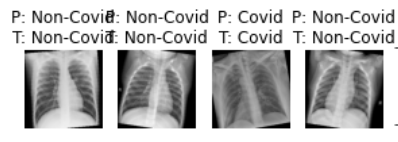

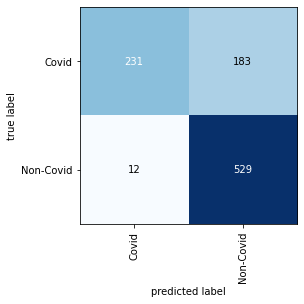

In [ ]:
mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()

Evaluation Metrics:

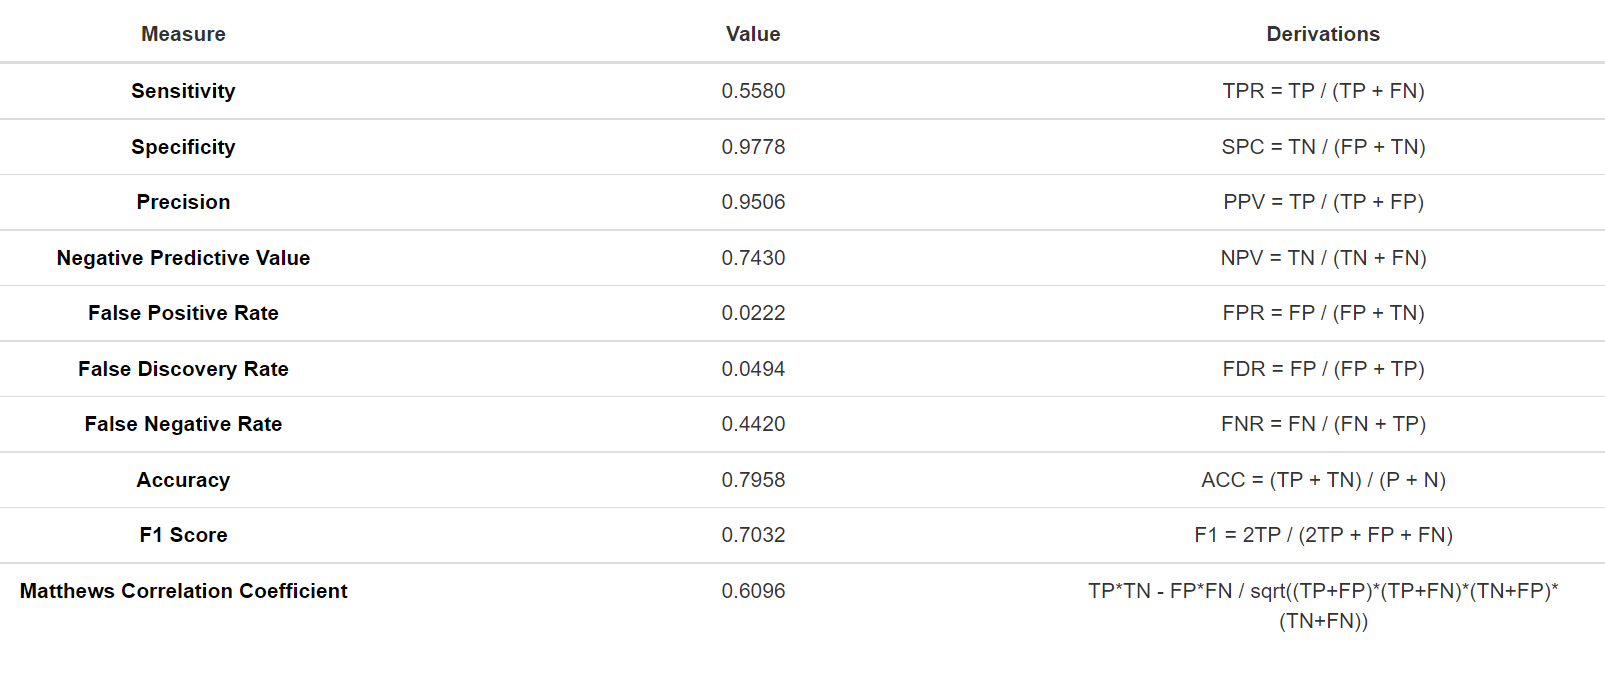

# VGG19 - Freezed the Feature Extracting Convolution layers and Training on only linear classifier layers  

In [ ]:
model = torchvision.models.vgg19(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
model.classifier[0].requires_grad = True
model.classifier[3].requires_grad = True

In [ ]:
model.classifier[6] = torch.nn.Linear(4096, 2)

Epoch: 001/003 | Batch 0000/1669 | Loss: 10.1828
Epoch: 001/003 | Batch 0100/1669 | Loss: 7.1779
Epoch: 001/003 | Batch 0200/1669 | Loss: 3.0876
Epoch: 001/003 | Batch 0300/1669 | Loss: 22.3437
Epoch: 001/003 | Batch 0400/1669 | Loss: 24.6550
Epoch: 001/003 | Batch 0500/1669 | Loss: 19.2444
Epoch: 001/003 | Batch 0600/1669 | Loss: 15.2220
Epoch: 001/003 | Batch 0700/1669 | Loss: 0.0000
Epoch: 001/003 | Batch 0800/1669 | Loss: 0.0011
Epoch: 001/003 | Batch 0900/1669 | Loss: 24.2354
Epoch: 001/003 | Batch 1000/1669 | Loss: 42.0048
Epoch: 001/003 | Batch 1100/1669 | Loss: 9.2720
Epoch: 001/003 | Batch 1200/1669 | Loss: 14.2616
Epoch: 001/003 | Batch 1300/1669 | Loss: 27.6935
Epoch: 001/003 | Batch 1400/1669 | Loss: 27.1844
Epoch: 001/003 | Batch 1500/1669 | Loss: 12.4946
Epoch: 001/003 | Batch 1600/1669 | Loss: 28.2659
Epoch: 001/003 | Train: 75.93% | Validation: 74.72%
Time elapsed: 48.32 min
Epoch: 002/003 | Batch 0000/1669 | Loss: 0.0000
Epoch: 002/003 | Batch 0100/1669 | Loss: 10.1265

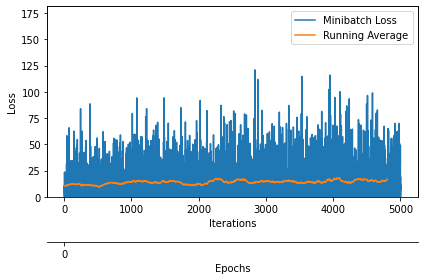

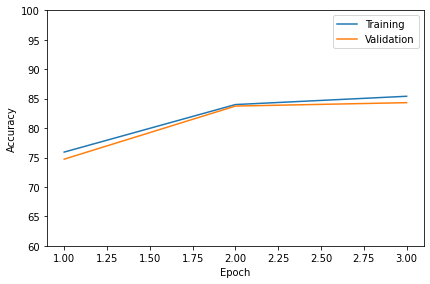

In [ ]:
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

VGG19 Epochwise Minibatch Loss and Running Average Loss
<br>
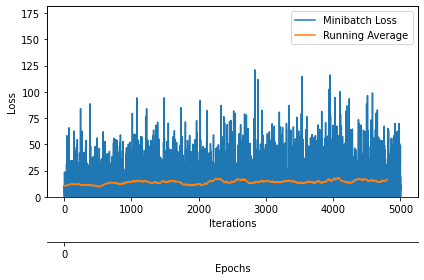 

VGG19 Epochwise Training Accuracy and Testing Accuracy
<br>
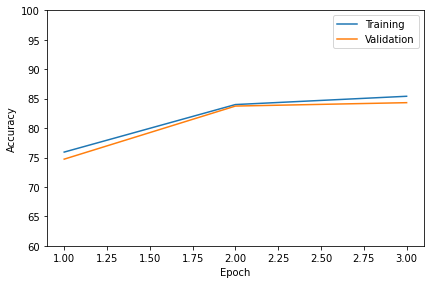

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/PRML Project/covid 19/weights/m1/vgg19_13_04_only_linear_layers.pth')

In [ ]:
model.cpu()
unnormalizer = UnNormalize(mean, std)
class_dict = {0: 'Covid',
              1: 'Non-Covid'}
show_examples(model=model, data_loader=test_loader, unnormalizer=unnormalizer, class_dict=class_dict)

VGG19 Predictions
<br>
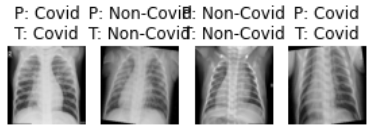

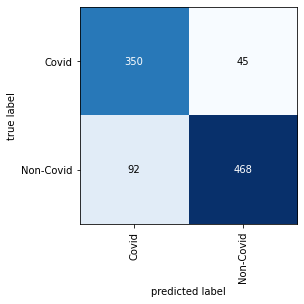

In [ ]:
mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()

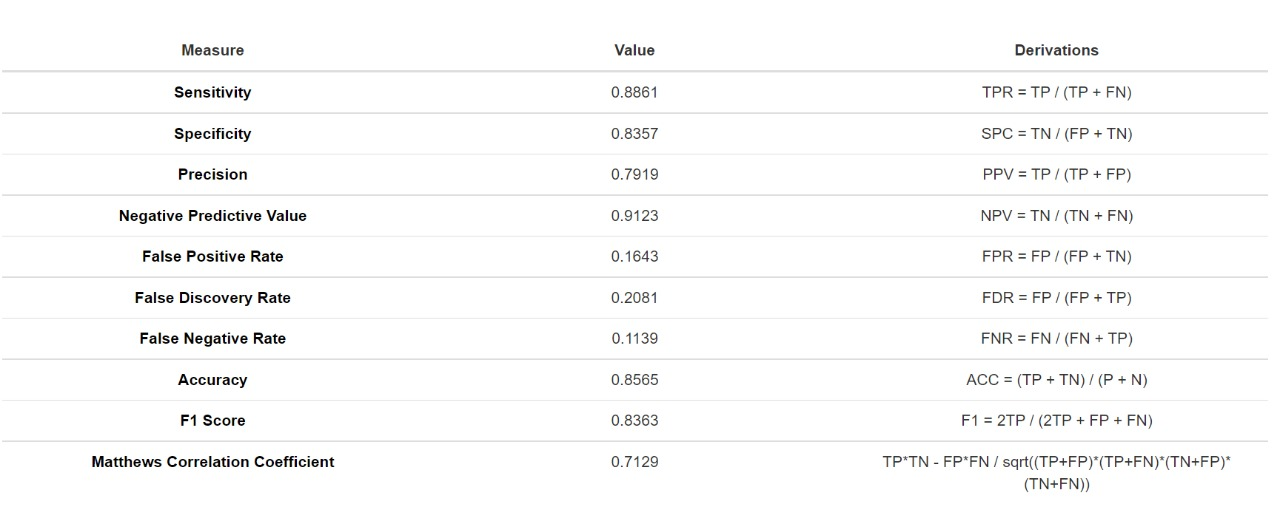

# Mobilenet V3 Small - Trained only Linear classification layer and freezed all feature extractors  

In [ ]:
model = torchvision.models.mobilenet_v3_small(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth


  0%|          | 0.00/9.83M [00:00<?, ?B/s]

MobileNetV3(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): ConvNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride

In [ ]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
model.classifier[0].requires_grad = True

In [ ]:
model.classifier[3] = torch.nn.Linear(1024, 2)

Epoch: 001/003 | Batch 0000/1669 | Loss: 0.7041
Epoch: 001/003 | Batch 0100/1669 | Loss: 0.1339
Epoch: 001/003 | Batch 0200/1669 | Loss: 0.2442
Epoch: 001/003 | Batch 0300/1669 | Loss: 1.4686
Epoch: 001/003 | Batch 0400/1669 | Loss: 0.0411
Epoch: 001/003 | Batch 0500/1669 | Loss: 1.4052
Epoch: 001/003 | Batch 0600/1669 | Loss: 0.4040
Epoch: 001/003 | Batch 0700/1669 | Loss: 0.0248
Epoch: 001/003 | Batch 0800/1669 | Loss: 0.5062
Epoch: 001/003 | Batch 0900/1669 | Loss: 2.9640
Epoch: 001/003 | Batch 1000/1669 | Loss: 0.2224
Epoch: 001/003 | Batch 1100/1669 | Loss: 0.0838
Epoch: 001/003 | Batch 1200/1669 | Loss: 0.6088
Epoch: 001/003 | Batch 1300/1669 | Loss: 0.0313
Epoch: 001/003 | Batch 1400/1669 | Loss: 0.0494
Epoch: 001/003 | Batch 1500/1669 | Loss: 0.5077
Epoch: 001/003 | Batch 1600/1669 | Loss: 1.8973
Epoch: 001/003 | Train: 82.17% | Validation: 82.28%
Time elapsed: 45.57 min
Epoch: 002/003 | Batch 0000/1669 | Loss: 0.6188
Epoch: 002/003 | Batch 0100/1669 | Loss: 2.2346
Epoch: 002/0

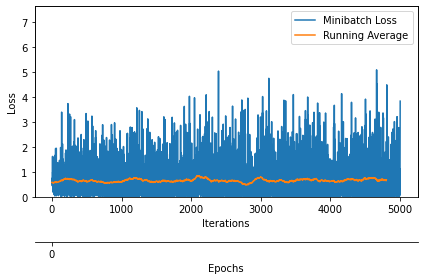

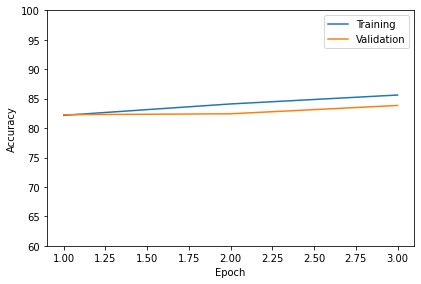

In [ ]:
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

Mobilenet V3 Small Epochwise Minibatch Loss and Running Average Loss
<br>
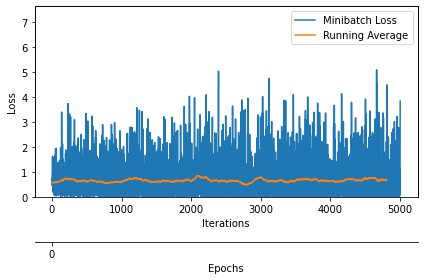

Mobilenet V3 Small Epochwise Training Accuracy and Validation Accuracy
<br>
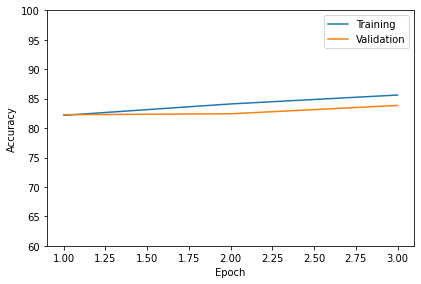 

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/PRML Project/covid 19/weights/m1/mobilenet_v3_small_only_linear_layers.pth')

In [ ]:
model.cpu()
unnormalizer = UnNormalize(mean, std)
class_dict = {0: 'Covid',
              1: 'Non-Covid'}
show_examples(model=model, data_loader=test_loader, unnormalizer=unnormalizer, class_dict=class_dict)

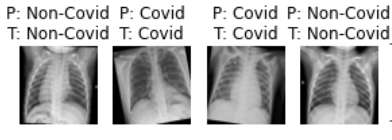

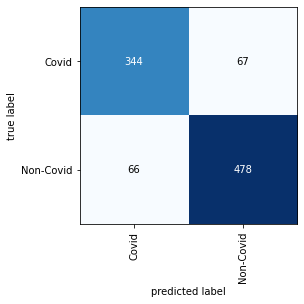

In [ ]:
mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()

# Scratch VGG Model - Trained Fully From Scratch For 40 Epochs

In [ ]:
from torch import nn

In [ ]:
class scratch_vgg19(nn.Module):
	#  Determine what layers and their order in CNN object 
    def __init__(self):
        super(scratch_vgg19, self).__init__()
        self.conv_layer1 = nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.relu1 = nn.ReLU()
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_layer2 = nn.Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.relu2 = nn.ReLU()
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_layer3 = nn.Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.relu3 = nn.ReLU()
        self.max_pool3 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_layer4 = nn.Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.relu4 = nn.ReLU()
        self.max_pool4 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.flat = nn.Flatten()
        self.fc1 = nn.Linear(100352, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 2)
    
    def forward(self, x):

        out = self.conv_layer1(x)
        out = self.relu1(out)
        out = self.max_pool1(out)

        out = self.conv_layer2(out)
        out = self.relu2(out)
        out = self.max_pool2(out)
                
        out = self.conv_layer3(out)
        out = self.relu3(out)
        out = self.max_pool3(out)
        
        out = self.conv_layer4(out)
        out = self.relu4(out)
        out = self.max_pool4(out)
        
        out = self.flat(out)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)

        return out

In [ ]:
model = scratch_vgg19()
model

scratch_vgg19(
  (conv_layer1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (max_pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu4): ReLU()
  (max_pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=100352, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_featur

Epoch: 001/040 | Batch 0000/0835 | Loss: 0.6929
Epoch: 001/040 | Batch 0100/0835 | Loss: 0.6625
Epoch: 001/040 | Batch 0200/0835 | Loss: 0.5856
Epoch: 001/040 | Batch 0300/0835 | Loss: 0.2909
Epoch: 001/040 | Batch 0400/0835 | Loss: 0.4469
Epoch: 001/040 | Batch 0500/0835 | Loss: 0.5004
Epoch: 001/040 | Batch 0600/0835 | Loss: 0.4532
Epoch: 001/040 | Batch 0700/0835 | Loss: 0.5385
Epoch: 001/040 | Batch 0800/0835 | Loss: 0.3586
Epoch: 001/040 | Train: 77.24% | Validation: 77.45%
Time elapsed: 26.97 min
Epoch: 002/040 | Batch 0000/0835 | Loss: 0.4302
Epoch: 002/040 | Batch 0100/0835 | Loss: 0.3939
Epoch: 002/040 | Batch 0200/0835 | Loss: 0.2912
Epoch: 002/040 | Batch 0300/0835 | Loss: 0.3888
Epoch: 002/040 | Batch 0400/0835 | Loss: 0.2631
Epoch: 002/040 | Batch 0500/0835 | Loss: 0.3026
Epoch: 002/040 | Batch 0600/0835 | Loss: 0.2750
Epoch: 002/040 | Batch 0700/0835 | Loss: 0.4944
Epoch: 002/040 | Batch 0800/0835 | Loss: 0.6866
Epoch: 002/040 | Train: 80.87% | Validation: 82.17%
Time ela

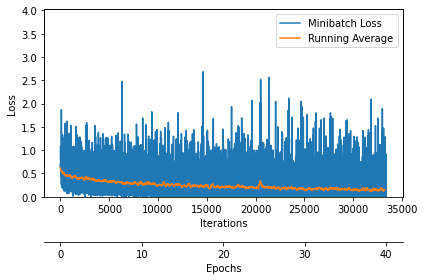

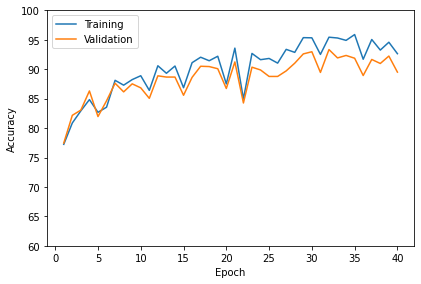

In [ ]:
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

Scratch VGG Epochwise Minibatch Loss and Running Average Loss
<br>
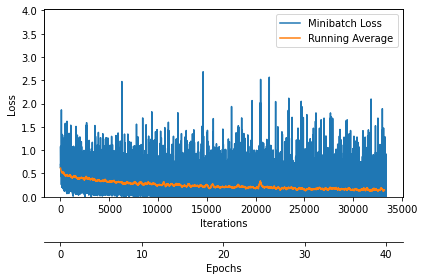

Scratch VGG Epochwise Training Accuracy and Validation Accuracy
<br>
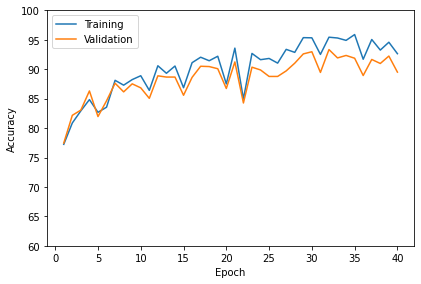

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/PRML Project/covid 19/weights/m1/vgg16_13_04_only_linear_layers.pth')

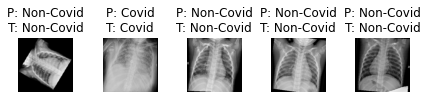

In [ ]:
model.cpu()
unnormalizer = UnNormalize(mean, std)
class_dict = {0: 'Covid',
              1: 'Non-Covid'}
show_examples(model=model, data_loader=test_loader, unnormalizer=unnormalizer, class_dict=class_dict)

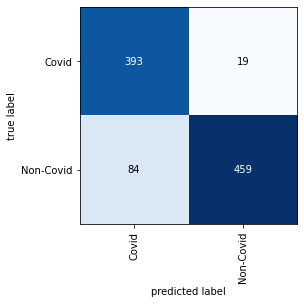

In [ ]:
mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()

Evaluation Metrics:

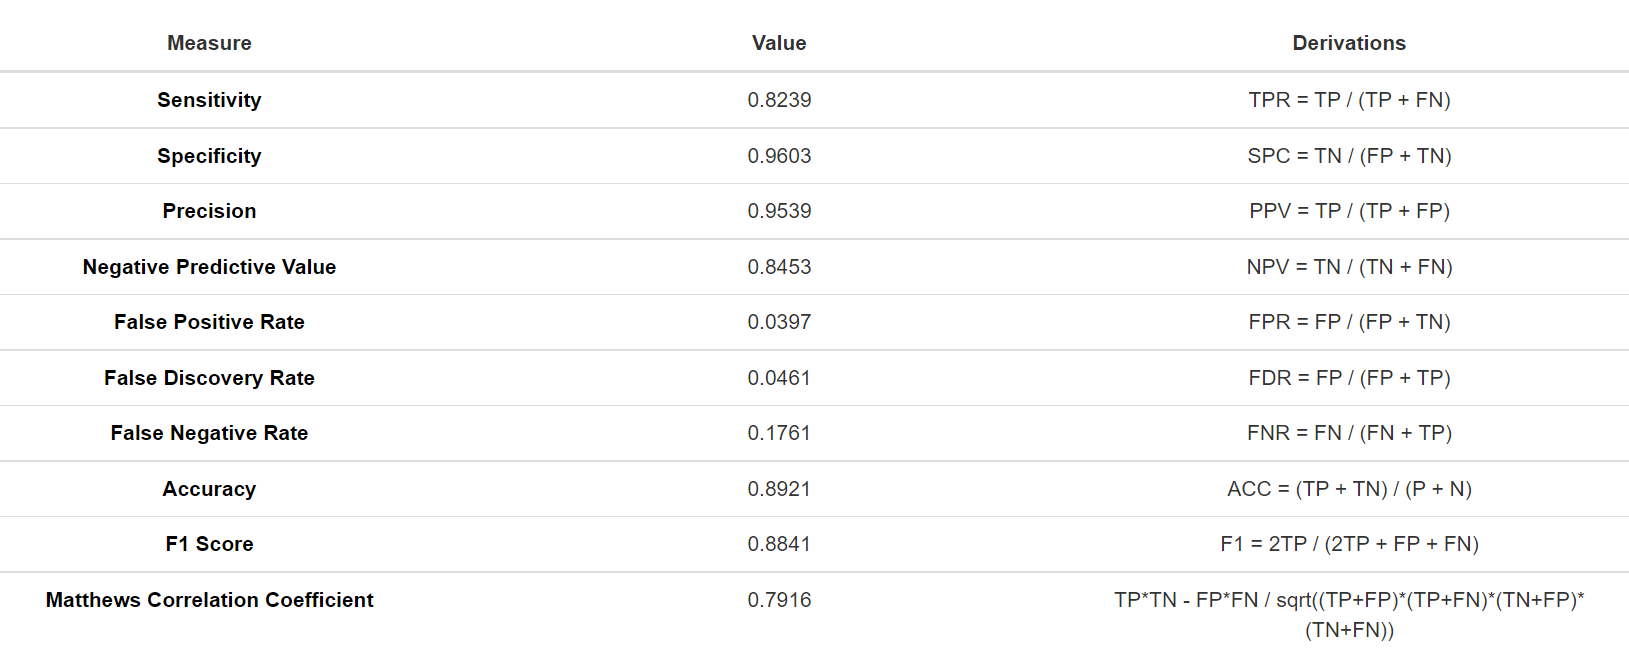

# Unet Model Training 

Unet Training Dataset: https://www.kaggle.com/code/nikhilpandey360/lung-segmentation-from-chest-x-ray-dataset/data

# Lung segmentation from Chest X-Ray dataset

**About the data**:
- The dataset is made up of images and segmentated mask from two diffrent sources.
- There is a slight abnormality in naming convention of masks.
- Some images don't have their corresponding masks.
- Images from the Shenzhen dataset has apparently smaller lungs as compared to the Montgomery dataset.


## Take a look at the dataset

In [ ]:
import numpy as np 
import tensorflow as tf
import pandas as pd
from tqdm import tqdm
import os
from cv2 import imread, createCLAHE 
import cv2
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

image_path = os.path.join("../input/data/Lung Segmentation/CXR_png")
mask_path = os.path.join("../input/data/Lung Segmentation/","masks/")


They can inspected the concerning dataset seperately [here](http://https://www.kaggle.com/kmader/pulmonary-chest-xray-abnormalities/home).

In [ ]:
# we have 704 masks but 800 images. Hence we are going to
# make a 1-1 correspondance from mask to images, not the usual other way.
images = os.listdir(image_path)
mask = os.listdir(mask_path)
mask = [fName.split(".png")[0] for fName in mask]
image_file_name = [fName.split("_mask")[0] for fName in mask]

In [ ]:
check = [i for i in mask if "mask" in i]
print("Total mask that has modified name:",len(check))

Earlier I was going to train on the Shenzhen dataset while perform prediction on the Montgomery dataset. However, the nature of the data was diffrent in both the set. The images from Shenzhen dataset had smaller lung-to-image ratio as compared to the Montgomery dataset.

Thus, I am loading the two dataset seperately which I combined once I got to know about the disparity.

In [ ]:
testing_files = set(os.listdir(image_path)) & set(os.listdir(mask_path))
training_files = check

def getData(X_shape, flag = "test"):
    im_array = []
    mask_array = []
    
    if flag == "test":
        for i in tqdm(testing_files): 
            im = cv2.resize(cv2.imread(os.path.join(image_path,i)),(X_shape,X_shape))[:,:,0]
            mask = cv2.resize(cv2.imread(os.path.join(mask_path,i)),(X_shape,X_shape))[:,:,0]
            
            im_array.append(im)
            mask_array.append(mask)
        
        return im_array,mask_array
    
    if flag == "train":
        for i in tqdm(training_files): 
            im = cv2.resize(cv2.imread(os.path.join(image_path,i.split("_mask")[0]+".png")),(X_shape,X_shape))[:,:,0]
            mask = cv2.resize(cv2.imread(os.path.join(mask_path,i+".png")),(X_shape,X_shape))[:,:,0]

            im_array.append(im)
            mask_array.append(mask)

        return im_array,mask_array

In [ ]:
#perform sanity check

def plotMask(X,y):
    sample = []
    
    for i in range(6):
        left = X[i]
        right = y[i]
        combined = np.hstack((left,right))
        sample.append(combined)
        
        
    for i in range(0,6,3):

        plt.figure(figsize=(25,10))
        
        plt.subplot(2,3,1+i)
        plt.imshow(sample[i])
        
        plt.subplot(2,3,2+i)
        plt.imshow(sample[i+1])
        
        
        plt.subplot(2,3,3+i)
        plt.imshow(sample[i+2])
        
        plt.show()

In [ ]:
# Load training and testing data
dim = 256*2
X_train,y_train = getData(dim,flag="train")
X_test, y_test = getData(dim)

# Perform Sanity Check

It is prudent to perform sanity check of the data correspondance. It become a routine check-up after a while but it is very crucial to check if we had made a mistake in loading the data.

In [ ]:
print("training set")
plotMask(X_train,y_train)
print("testing set")
plotMask(X_test,y_test)

Both the sets looks correct. Let's combine them and further use them as a unified dataset.

In [ ]:
X_train = np.array(X_train).reshape(len(X_train),dim,dim,1)
y_train = np.array(y_train).reshape(len(y_train),dim,dim,1)
X_test = np.array(X_test).reshape(len(X_test),dim,dim,1)
y_test = np.array(y_test).reshape(len(y_test),dim,dim,1)
assert X_train.shape == y_train.shape
assert X_test.shape == y_test.shape
images = np.concatenate((X_train,X_test),axis=0)
mask  = np.concatenate((y_train,y_test),axis=0)

## Define  the network and callbacks

I am going to use my favourite segmentation network - U-Nets. You can read about them [here](https://arxiv.org/abs/1505.04597).

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler


def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

def unet(input_size=(256,256,1)):
    inputs = Input(input_size)
    
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return Model(inputs=[inputs], outputs=[conv10])

#### Compile and train the Unet Model

In [ ]:
model = unet(input_size=(512,512,1))
model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
                  metrics=[dice_coef, 'binary_accuracy'])
model.summary()

## Callbacks, Early Stopping and Reduced LR


In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('cxr_reg')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.5, 
                                   patience=3, 
                                   verbose=1, mode='min', epsilon=0.0001, cooldown=2, min_lr=1e-6)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=15) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

#### Train the model

I intially used a 60-40 train-test spit and got a loss of -0.97. However, the better way to do it is 80-10-10 train-test-validation spit. Below I am roughly doing the later.

In [ ]:
from IPython.display import clear_output
from keras.optimizers import Adam 
from sklearn.model_selection import train_test_split

model.compile(optimizer=Adam(lr=2e-4), 
              loss=[dice_coef_loss], 
           metrics = [dice_coef, 'binary_accuracy'])

train_vol, validation_vol, train_seg, validation_seg = train_test_split((images-127.0)/127.0, 
                                                            (mask>127).astype(np.float32), 
                                                            test_size = 0.1,random_state = 2018)

train_vol, test_vol, train_seg, test_seg = train_test_split(train_vol,train_seg, 
                                                            test_size = 0.1, 
                                                            random_state = 2018)

loss_history = model.fit(x = train_vol,
                       y = train_seg,
                         batch_size = 16,
                  epochs = 50,
                  validation_data =(test_vol,test_seg) ,
                  callbacks=callbacks_list)


clear_output()

## Plot the metric and evaluate 

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(loss_history.history['loss'], '-', label = 'Loss')
ax1.plot(loss_history.history['val_loss'], '-', label = 'Validation Loss')
ax1.legend()

ax2.plot(100*np.array(loss_history.history['binary_accuracy']), '-', 
         label = 'Accuracy')
ax2.plot(100*np.array(loss_history.history['val_binary_accuracy']), '-',
         label = 'Validation Accuracy')
ax2.legend()

## Test the model

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)

plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

# Unet Forward Pass on the Stored Weights to get masks, inverse masks, masked Images and Inverse masked Images

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np 
import tensorflow as tf
import pandas as pd
from tqdm import tqdm
import os
from cv2 import imread, createCLAHE 
import cv2
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
len(os.listdir('/content/drive/MyDrive/PRML Project/covid 19/Extensive COVID-19 X-Ray and CT Chest Images Dataset.zip (Unzipped Files)/COVID-19 Dataset.zip (Unzipped Files)/COVID-19 Dataset/X-ray/COVID'))

4044

In [ ]:
allcovid = os.listdir('/content/drive/MyDrive/PRML Project/covid 19/Extensive COVID-19 X-Ray and CT Chest Images Dataset.zip (Unzipped Files)/COVID-19 Dataset.zip (Unzipped Files)/COVID-19 Dataset/X-ray/COVID')

In [ ]:
allnoncovid = os.listdir('/content/drive/MyDrive/PRML Project/covid 19/Extensive COVID-19 X-Ray and CT Chest Images Dataset.zip (Unzipped Files)/COVID-19 Dataset.zip (Unzipped Files)/COVID-19 Dataset/X-ray/Non-COVID')

In [ ]:
base_covid = '/content/drive/MyDrive/PRML Project/covid 19/Extensive COVID-19 X-Ray and CT Chest Images Dataset.zip (Unzipped Files)/COVID-19 Dataset.zip (Unzipped Files)/COVID-19 Dataset/X-ray/COVID/'
base_non_covid = '/content/drive/MyDrive/PRML Project/covid 19/Extensive COVID-19 X-Ray and CT Chest Images Dataset.zip (Unzipped Files)/COVID-19 Dataset.zip (Unzipped Files)/COVID-19 Dataset/X-ray/Non-COVID/'
covid_masks = '/content/drive/MyDrive/PRML Project/covid 19/masks/Covid/'
non_covid_masks = '/content/drive/MyDrive/PRML Project/covid 19/masks/Non-Covid/'
invcovid_masks = '/content/drive/MyDrive/PRML Project/covid 19/inverse_masks/Covid/'
invnon_covid_masks = '/content/drive/MyDrive/PRML Project/covid 19/inverse_masks/Non-Covid/'

In [ ]:
img1 = os.path.join(base_covid + allcovid[0])

In [ ]:
img1

'/content/drive/MyDrive/PRML Project/covid 19/Extensive COVID-19 X-Ray and CT Chest Images Dataset.zip (Unzipped Files)/COVID-19 Dataset.zip (Unzipped Files)/COVID-19 Dataset/X-ray/COVID/person1535_virus_2672.jpeg'

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler


def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

def unet(input_size=(256,256,1)):
    inputs = Input(input_size)
    
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return Model(inputs=[inputs], outputs=[conv10])

In [ ]:
!pip install keras

In [ ]:
from tensorflow.keras.optimizers import Adam
model = unet(input_size=(512,512,1))
model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
                  metrics=[dice_coef, 'binary_accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 512, 512, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Transfer learning Approach 
<br>
Link to weights: https://drive.google.com/file/d/1QBKh0PHwDEIF1F2Q_TPjpt-5D-pnitgX/view?usp=sharing

In [ ]:
model.load_weights('/content/drive/MyDrive/PRML Project/covid 19/Pretrained_Unet/cxr_reg_weights.best.hdf5')

SegmentImage Function - For predicting the masks, inverse masks(complimentary of masks), masked image(mutiplication of masks with cxr image) and inverse masked image(multiplication of inverse masks with cxr image)

In [ ]:
def SegmentImage(model,path,img_shape = (512,512),threshold = 0.5):
    '''
    **********Input**************
    model: segmentation model (h5)
    path: filepath to image (string)
    img_shape: shape of the image(IMG_WIDTH,IMG_HEIGHT) used in segmenation model
    threshold: float value varing between 0 and 1, thresholding the mask
    *********Output*************
    return: Segment mask, segmented image, original image
    '''
    IMG_WIDTH,IMG_HEIGHT = img_shape
    ori_x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    ori_x = cv2.resize(ori_x, (IMG_HEIGHT,IMG_WIDTH))
    x = ori_x/255.0
    x = x.astype(np.float32)
    x = np.expand_dims(x, axis=0)
    y_pred = model.predict(x)[0] > threshold
    y_pred = y_pred.astype(np.int32)
    plt.imsave('mask.jpeg',np.squeeze(y_pred),cmap='gray')
    maskapply = cv2.imread('mask.jpeg')
    maskapply = cv2.cvtColor(maskapply, cv2.COLOR_BGR2GRAY)
    chest_image = ori_x
    chest_image = cv2.resize(chest_image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_NEAREST)
    masked_image = cv2.bitwise_and(maskapply,chest_image)

    invmaskapply = cv2.bitwise_not(maskapply)
    invmasked_image = cv2.bitwise_and(invmaskapply,chest_image)
    return maskapply,invmaskapply,masked_image,invmasked_image,chest_image

Forward Pass the Dataset on the Pretrained Model and store the masked and Inverse masked Images in Drive

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
for fpath in allcovid:
  imgpath = os.path.join(base_covid + fpath)
  maskapply,invmaskapply,masked_image,invmasked_image,chest_image = SegmentImage(model, imgpath)
  mask_path = os.path.join(covid_masks, fpath)
  mask_path = os.path.splitext(mask_path)[0] + '.jpg'
  cv2.imwrite(mask_path, masked_image)
  invmask_path = os.path.join(invcovid_masks, fpath)
  invmask_path = os.path.splitext(invmask_path)[0] + '.jpg'
  cv2.imwrite(invmask_path, invmasked_image)

In [ ]:
for fpath in allnoncovid:
  imgpath = os.path.join(base_non_covid + fpath)
  maskapply,invmaskapfpathply,masked_image,invmasked_image,chest_image = SegmentImage(model, imgpath)
  mask_path = os.path.join(non_covid_masks, fpath)
  mask_path = os.path.splitext(mask_path)[0] + '.jpg'
  cv2.imwrite(mask_path, masked_image)
  invmask_path = os.path.join(invnon_covid_masks, fpath)
  invmask_path = os.path.splitext(invmask_path)[0] + '.jpg'
  cv2.imwrite(invmask_path, invmasked_image)

# Scratch VGG Trained on Segmented Masked Images of Unet 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
len(os.listdir('/content/drive/MyDrive/PRML Project/covid 19/masks/Non-Covid/'))

In [ ]:
len(os.listdir('/content/drive/MyDrive/PRML Project/covid 19/inverse_masks/Non-Covid/'))

In [ ]:
os.listdir('/content/drive/MyDrive/PRML Project/covid 19/Extensive COVID-19 X-Ray and CT Chest Images Dataset.zip (Unzipped Files)/COVID-19 Dataset.zip (Unzipped Files)/COVID-19 Dataset/X-ray')

In [ ]:
len(os.listdir('/content/drive/MyDrive/PRML Project/covid 19/Extensive COVID-19 X-Ray and CT Chest Images Dataset.zip (Unzipped Files)/COVID-19 Dataset.zip (Unzipped Files)/COVID-19 Dataset/X-ray/COVID'))

In [ ]:
len(os.listdir('/content/drive/MyDrive/PRML Project/covid 19/Extensive COVID-19 X-Ray and CT Chest Images Dataset.zip (Unzipped Files)/COVID-19 Dataset.zip (Unzipped Files)/COVID-19 Dataset/X-ray/Non-COVID'))

In [ ]:
dataset_path = '/content/drive/MyDrive/PRML Project/covid 19/masks'

In [ ]:
dataset_transforms = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

In [ ]:
def get_mean_and_std(loader):
  mean = 0.
  std = 0.
  total_images_count = 0
  for images, _ in loader:
    image_count_in_a_batch = images.size(0)
    images = images.view(image_count_in_a_batch, images.size(1), -1)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)
    total_images_count += image_count_in_a_batch
  mean /= total_images_count
  std /= total_images_count

  return mean, std 

In [ ]:
from torchvision.transforms.transforms import RandomHorizontalFlip
dataset_transforms2 = transforms.Compose([
                                          transforms.Resize((224,224)), 
                                          transforms.RandomHorizontalFlip(),
                                          transforms.RandomRotation(10),
                                          transforms.ToTensor(),
                                        ])

In [ ]:
dataset = torchvision.datasets.ImageFolder(root = dataset_path, transform = dataset_transforms2)

In [ ]:
len(dataset)

In [ ]:
train_size = int(0.7 * len(dataset))
validation_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - validation_size
train_dataset, validation_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size,validation_size,test_size])

In [ ]:
dataset_loader = torch.utils.data.DataLoader(dataset = dataset, batch_size = 8, shuffle = True)

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 8, shuffle = True)
valid_loader = torch.utils.data.DataLoader(dataset = validation_dataset, batch_size = 8)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = 8)

In [ ]:
# get_mean_and_std(dataset_loader)

In [ ]:
def show_transformed_images(dataset):
  loader = torch.utils.data.DataLoader(dataset, batch_size = 6, shuffle = True)
  batch = next(iter(loader))
  images, labels = batch

  grid = torchvision.utils.make_grid(images, nrow = 3)
  plt.figure(figsize = (11,11))
  plt.imshow(np.transpose(grid, (1,2,0)))
  print("labels: ", labels)

In [ ]:
show_transformed_images(dataset)

In [ ]:
# show_transformed_images(train_dataset)

In [ ]:
# show_transformed_images(validation_dataset)

In [ ]:
def set_device():
  if torch.cuda.is_available():
    dev = "cuda:0"
  else:
    dev = "cpu"
  return torch.device(dev)

In [ ]:
# DEVICE = set_device()

In [ ]:
# DEVICE

In [ ]:
!nvidia-smi

In [ ]:
# imports from installed libraries
import os
import numpy as np
import random
import torch
from distutils.version import LooseVersion as Version
from itertools import product

def set_all_seeds(seed):
    os.environ["PL_GLOBAL_SEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)


def set_deterministic(use_tensorcores=False):
    if torch.cuda.is_available():
        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True

    if torch.__version__ <= Version("1.7"):
        torch.set_deterministic(True)
    else:
        torch.use_deterministic_algorithms(True)
        
        # The following are set to True by default and allow cards
        # like the Ampere and newer to utilize tensorcores for
        # convolutions and matrix multiplications, which can result
        # in a significant speed-up. However, results may differ compared
        # to card how don't use mixed precision via tensor cores.
        torch.backends.cuda.matmul.allow_tf32 = use_tensorcores
        torch.backends.cudnn.allow_tf32 = use_tensorcores


def compute_accuracy(model, data_loader, device):

    with torch.no_grad():

        correct_pred, num_examples = 0, 0

        for i, (features, targets) in enumerate(data_loader):

            features = features.to(device)
            targets = targets.float().to(device)

            logits = model(features)
            _, predicted_labels = torch.max(logits, 1)

            num_examples += targets.size(0)
            correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100


def compute_confusion_matrix(model, data_loader, device):

    all_targets, all_predictions = [], []
    with torch.no_grad():

        for i, (features, targets) in enumerate(data_loader):

            features = features.to(device)
            targets = targets
            logits = model(features)
            _, predicted_labels = torch.max(logits, 1)
            all_targets.extend(targets.to('cpu'))
            all_predictions.extend(predicted_labels.to('cpu'))

    all_predictions = all_predictions
    all_predictions = np.array(all_predictions)
    all_targets = np.array(all_targets)
        
    class_labels = np.unique(np.concatenate((all_targets, all_predictions)))
    if class_labels.shape[0] == 1:
        if class_labels[0] != 0:
            class_labels = np.array([0, class_labels[0]])
        else:
            class_labels = np.array([class_labels[0], 1])
    n_labels = class_labels.shape[0]
    lst = []
    z = list(zip(all_targets, all_predictions))
    for combi in product(class_labels, repeat=2):
        lst.append(z.count(combi))
    mat = np.asarray(lst)[:, None].reshape(n_labels, n_labels)
    return mat

In [ ]:
import time
import torch

def train_model(model, num_epochs, train_loader,
                valid_loader, test_loader, optimizer,
                device, logging_interval=50,
                scheduler=None,
                scheduler_on='valid_acc'):

    start_time = time.time()
    minibatch_loss_list, train_acc_list, valid_acc_list = [], [], []
    
    best_acc = 0
    for epoch in range(num_epochs):

        model.train()
        for batch_idx, (features, targets) in enumerate(train_loader):

            features = features.to(device)
            targets = targets.to(device)

            # ## FORWARD AND BACK PROP
            logits = model(features)
            loss = torch.nn.functional.cross_entropy(logits, targets)
            optimizer.zero_grad()

            loss.backward()

            # ## UPDATE MODEL PARAMETERS
            optimizer.step()

            # ## LOGGING
            minibatch_loss_list.append(loss.item())
            if not batch_idx % logging_interval:
                print(f'Epoch: {epoch+1:03d}/{num_epochs:03d} '
                      f'| Batch {batch_idx:04d}/{len(train_loader):04d} '
                      f'| Loss: {loss:.4f}')

        model.eval()
        with torch.no_grad():  # save memory during inference
            train_acc = compute_accuracy(model, train_loader, device=device)
            valid_acc = compute_accuracy(model, valid_loader, device=device)
            print(f'Epoch: {epoch+1:03d}/{num_epochs:03d} '
                  f'| Train: {train_acc :.2f}% '
                  f'| Validation: {valid_acc :.2f}%')
            train_acc_list.append(train_acc.item())
            valid_acc_list.append(valid_acc.item())

        if(valid_acc.item() > best_acc):
          best_acc = valid_acc.item()
          torch.save(model.state_dict(), f'/content/drive/MyDrive/PRML Project/covid 19/Unet_M2_weights/vgg19_full_unetmask_01_05_{valid_acc.item()}.pt')

        elapsed = (time.time() - start_time)/60
        print(f'Time elapsed: {elapsed:.2f} min')
        
        if scheduler is not None:

            if scheduler_on == 'valid_acc':
                scheduler.step(valid_acc_list[-1])
            elif scheduler_on == 'minibatch_loss':
                scheduler.step(minibatch_loss_list[-1])
            else:
                raise ValueError(f'Invalid `scheduler_on` choice.')
        

    elapsed = (time.time() - start_time)/60
    print(f'Total Training Time: {elapsed:.2f} min')

    test_acc = compute_accuracy(model, test_loader, device=device)
    print(f'Test accuracy {test_acc :.2f}%')

    return minibatch_loss_list, train_acc_list, valid_acc_list

In [ ]:
# imports from installed libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import torch


def plot_training_loss(minibatch_loss_list, num_epochs, iter_per_epoch,
                       results_dir=None, averaging_iterations=100):

    plt.figure()
    ax1 = plt.subplot(1, 1, 1)
    ax1.plot(range(len(minibatch_loss_list)),
             (minibatch_loss_list), label='Minibatch Loss')

    if len(minibatch_loss_list) > 1000:
        ax1.set_ylim([
            0, np.max(minibatch_loss_list[1000:])*1.5
            ])
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Loss')

    ax1.plot(np.convolve(minibatch_loss_list,
                         np.ones(averaging_iterations,)/averaging_iterations,
                         mode='valid'),
             label='Running Average')
    ax1.legend()

    ###################
    # Set scond x-axis
    ax2 = ax1.twiny()
    newlabel = list(range(num_epochs+1))

    newpos = [e*iter_per_epoch for e in newlabel]

    ax2.set_xticks(newpos[::10])
    ax2.set_xticklabels(newlabel[::10])

    ax2.xaxis.set_ticks_position('bottom')
    ax2.xaxis.set_label_position('bottom')
    ax2.spines['bottom'].set_position(('outward', 45))
    ax2.set_xlabel('Epochs')
    ax2.set_xlim(ax1.get_xlim())
    ###################

    plt.tight_layout()

    if results_dir is not None:
        image_path = os.path.join(results_dir, 'plot_training_loss.pdf')
        plt.savefig(image_path)


def plot_accuracy(train_acc_list, valid_acc_list, results_dir):

    num_epochs = len(train_acc_list)

    plt.plot(np.arange(1, num_epochs+1),
             train_acc_list, label='Training')
    plt.plot(np.arange(1, num_epochs+1),
             valid_acc_list, label='Validation')

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()

    if results_dir is not None:
        image_path = os.path.join(
            results_dir, 'plot_acc_training_validation.pdf')
        plt.savefig(image_path)


def show_examples(model, data_loader, unnormalizer=None, class_dict=None):
    
        
    for batch_idx, (features, targets) in enumerate(data_loader):

        with torch.no_grad():
            features = features
            targets = targets
            logits = model(features)
            predictions = torch.argmax(logits, dim=1)
        break

    fig, axes = plt.subplots(nrows=1, ncols=5,
                             sharex=True, sharey=True)
    
    if unnormalizer is not None:
        for idx in range(features.shape[0]):
            features[idx] = unnormalizer(features[idx])
    nhwc_img = np.transpose(features, axes=(0, 2, 3, 1))
    
    if nhwc_img.shape[-1] == 1:
        nhw_img = np.squeeze(nhwc_img.numpy(), axis=3)

        for idx, ax in enumerate(axes.ravel()):
            ax.imshow(nhw_img[idx], cmap='binary')
            if class_dict is not None:
                ax.title.set_text(f'P: {class_dict[predictions[idx].item()]}'
                                  f'\nT: {class_dict[targets[idx].item()]}')
            else:
                ax.title.set_text(f'P: {predictions[idx]} | T: {targets[idx]}')
            ax.axison = False

    else:

        for idx, ax in enumerate(axes.ravel()):
            ax.imshow(nhwc_img[idx])
            if class_dict is not None:
                ax.title.set_text(f'P: {class_dict[predictions[idx].item()]}'
                                  f'\nT: {class_dict[targets[idx].item()]}')
            else:
                ax.title.set_text(f'P: {predictions[idx]} | T: {targets[idx]}')
            ax.axison = False
    plt.tight_layout()
    plt.show()


def plot_confusion_matrix(conf_mat,
                          hide_spines=False,
                          hide_ticks=False,
                          figsize=None,
                          cmap=None,
                          colorbar=False,
                          show_absolute=True,
                          show_normed=False,
                          class_names=None):

    if not (show_absolute or show_normed):
        raise AssertionError('Both show_absolute and show_normed are False')
    if class_names is not None and len(class_names) != len(conf_mat):
        raise AssertionError('len(class_names) should be equal to number of'
                             'classes in the dataset')

    total_samples = conf_mat.sum(axis=1)[:, np.newaxis]
    normed_conf_mat = conf_mat.astype('float') / total_samples

    fig, ax = plt.subplots(figsize=figsize)
    ax.grid(False)
    if cmap is None:
        cmap = plt.cm.Blues

    if figsize is None:
        figsize = (len(conf_mat)*1.25, len(conf_mat)*1.25)

    if show_normed:
        matshow = ax.matshow(normed_conf_mat, cmap=cmap)
    else:
        matshow = ax.matshow(conf_mat, cmap=cmap)

    if colorbar:
        fig.colorbar(matshow)

    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            cell_text = ""
            if show_absolute:
                cell_text += format(conf_mat[i, j], 'd')
                if show_normed:
                    cell_text += "\n" + '('
                    cell_text += format(normed_conf_mat[i, j], '.2f') + ')'
            else:
                cell_text += format(normed_conf_mat[i, j], '.2f')
            ax.text(x=j,
                    y=i,
                    s=cell_text,
                    va='center',
                    ha='center',
                    color="white" if normed_conf_mat[i, j] > 0.5 else "black")
    
    if class_names is not None:
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names, rotation=90)
        plt.yticks(tick_marks, class_names)
        
    if hide_spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    if hide_ticks:
        ax.axes.get_yaxis().set_ticks([])
        ax.axes.get_xaxis().set_ticks([])

    plt.xlabel('predicted label')
    plt.ylabel('true label')
    return fig, ax

In [3]:
import torch
from torch.utils.data import sampler
from torchvision import datasets
from torch.utils.data import DataLoader
from torch.utils.data import SubsetRandomSampler
from torchvision import transforms


class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        """
        Parameters:
        ------------
        tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        
        Returns:
        ------------
        Tensor: Normalized image.
        """
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
        return tensor

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
RANDOM_SEED = 123
BATCH_SIZE = 128
NUM_EPOCHS = 40
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
set_all_seeds(RANDOM_SEED)
#set_deterministic()

In [ ]:
# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

In [ ]:
from torch import nn

In [ ]:
class scratch_vgg19(nn.Module):
	#  Determine what layers and their order in CNN object 
    def __init__(self):
        super(scratch_vgg19, self).__init__()
        self.conv_layer1 = nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.relu1 = nn.ReLU()
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_layer2 = nn.Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.relu2 = nn.ReLU()
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_layer3 = nn.Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.relu3 = nn.ReLU()
        self.max_pool3 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_layer4 = nn.Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.relu4 = nn.ReLU()
        self.max_pool4 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.flat = nn.Flatten()
        self.fc1 = nn.Linear(100352, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 2)
    
    def forward(self, x):

        out = self.conv_layer1(x)
        out = self.relu1(out)
        out = self.max_pool1(out)

        out = self.conv_layer2(out)
        out = self.relu2(out)
        out = self.max_pool2(out)
                
        out = self.conv_layer3(out)
        out = self.relu3(out)
        out = self.max_pool3(out)
        
        out = self.conv_layer4(out)
        out = self.relu4(out)
        out = self.max_pool4(out)
        
        out = self.flat(out)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)

        return out

In [ ]:
model = scratch_vgg19()
model

Epoch: 001/040 | Batch 0000/0829 | Loss: 0.6931
Epoch: 001/040 | Batch 0100/0829 | Loss: 0.6510
Epoch: 001/040 | Batch 0200/0829 | Loss: 0.6657
Epoch: 001/040 | Batch 0300/0829 | Loss: 0.6925
Epoch: 001/040 | Batch 0400/0829 | Loss: 0.8216
Epoch: 001/040 | Batch 0500/0829 | Loss: 0.5968
Epoch: 001/040 | Batch 0600/0829 | Loss: 0.3345
Epoch: 001/040 | Batch 0700/0829 | Loss: 0.4266
Epoch: 001/040 | Batch 0800/0829 | Loss: 0.3382
Epoch: 001/040 | Train: 73.82% | Validation: 73.44%
Time elapsed: 19.25 min
Epoch: 002/040 | Batch 0000/0829 | Loss: 0.5285
Epoch: 002/040 | Batch 0100/0829 | Loss: 0.7637
Epoch: 002/040 | Batch 0200/0829 | Loss: 0.4916
Epoch: 002/040 | Batch 0300/0829 | Loss: 0.6370
Epoch: 002/040 | Batch 0400/0829 | Loss: 0.5492
Epoch: 002/040 | Batch 0500/0829 | Loss: 0.3334
Epoch: 002/040 | Batch 0600/0829 | Loss: 0.4967
Epoch: 002/040 | Batch 0700/0829 | Loss: 0.5665
Epoch: 002/040 | Batch 0800/0829 | Loss: 0.7568
Epoch: 002/040 | Train: 73.91% | Validation: 73.13%
Time ela

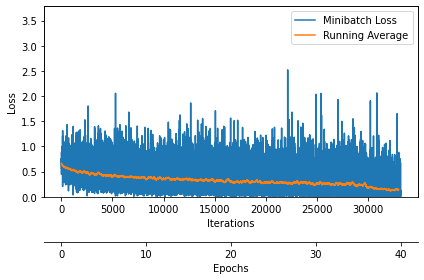

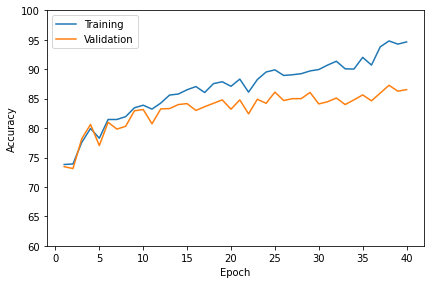

In [ ]:
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

Scratch VGG (trained on Segmented Masked Images) Epochwise Minibatch Loss and Running Average Loss
<br>
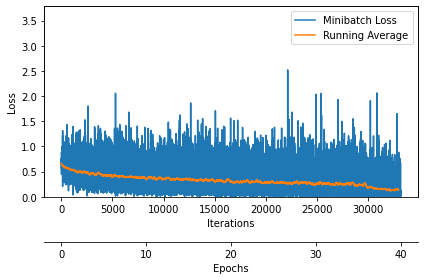


Scratch VGG (trained on Segmented Masked Images) Epochwise Training Accuracy and Validation Accuracy
<br>
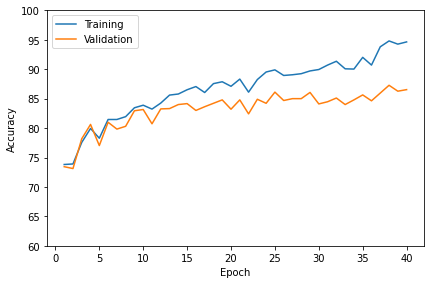

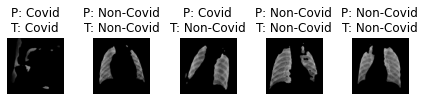

In [ ]:
model.cpu()
class_dict = {0: 'Covid',
              1: 'Non-Covid'}
show_examples(model=model, data_loader=test_loader, unnormalizer=None, class_dict=class_dict)

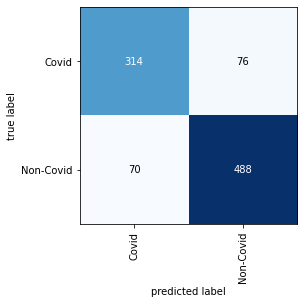

In [ ]:
mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()

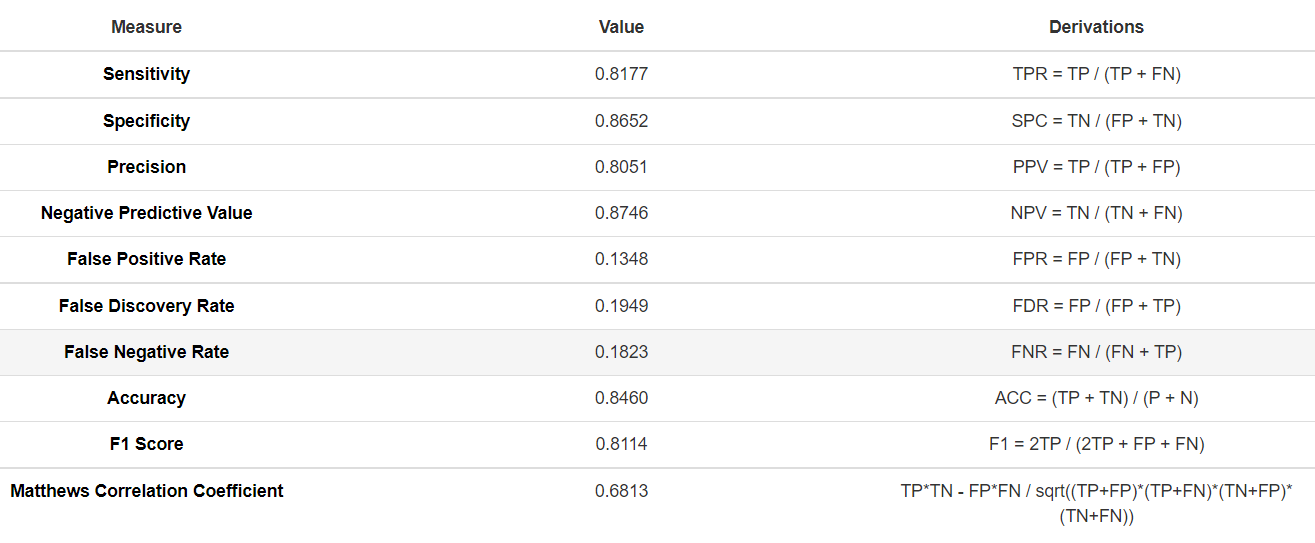

Scratch VGG Trained on Segmented Inverse Masked Images of Unet 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
len(os.listdir('/content/drive/MyDrive/PRML Project/covid 19/inverse_masks/Non-Covid/'))

5428

In [ ]:
len(os.listdir('/content/drive/MyDrive/PRML Project/covid 19/inverse_masks/Covid/'))

4044

In [ ]:
dataset_path = '/content/drive/MyDrive/PRML Project/covid 19/inverse_masks'

In [ ]:
dataset_transforms = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

In [ ]:
def get_mean_and_std(loader):
  mean = 0.
  std = 0.
  total_images_count = 0
  for images, _ in loader:
    image_count_in_a_batch = images.size(0)
    images = images.view(image_count_in_a_batch, images.size(1), -1)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)
    total_images_count += image_count_in_a_batch
  mean /= total_images_count
  std /= total_images_count

  return mean, std 

In [ ]:
from torchvision.transforms.transforms import RandomHorizontalFlip
dataset_transforms2 = transforms.Compose([
                                          transforms.Resize((224,224)), 
                                          transforms.RandomHorizontalFlip(),
                                          transforms.RandomRotation(10),
                                          transforms.ToTensor(),
                                        ])

In [ ]:
dataset = torchvision.datasets.ImageFolder(root = dataset_path, transform = dataset_transforms2)

In [ ]:
len(dataset)

9472

In [ ]:
train_size = int(0.7 * len(dataset))
validation_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - validation_size
train_dataset, validation_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size,validation_size,test_size])

In [ ]:
dataset_loader = torch.utils.data.DataLoader(dataset = dataset, batch_size = 8, shuffle = True)

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 8, shuffle = True)
valid_loader = torch.utils.data.DataLoader(dataset = validation_dataset, batch_size = 8)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = 8)

In [ ]:
# get_mean_and_std(dataset_loader)

In [ ]:
def show_transformed_images(dataset):
  loader = torch.utils.data.DataLoader(dataset, batch_size = 6, shuffle = True)
  batch = next(iter(loader))
  images, labels = batch

  grid = torchvision.utils.make_grid(images, nrow = 3)
  plt.figure(figsize = (11,11))
  plt.imshow(np.transpose(grid, (1,2,0)))
  print("labels: ", labels)

labels:  tensor([1, 0, 0, 1, 0, 0])


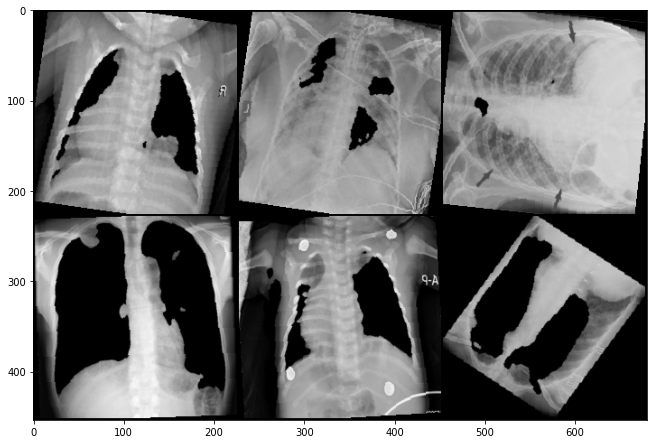

In [ ]:
show_transformed_images(dataset)

In [ ]:
# show_transformed_images(train_dataset)

In [ ]:
# show_transformed_images(validation_dataset)

In [ ]:
def set_device():
  if torch.cuda.is_available():
    dev = "cuda:0"
  else:
    dev = "cpu"
  return torch.device(dev)

In [ ]:
# DEVICE = set_device()

In [ ]:
# DEVICE

In [ ]:
!nvidia-smi

Sun May  1 09:57:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# imports from installed libraries
import os
import numpy as np
import random
import torch
from distutils.version import LooseVersion as Version
from itertools import product

def set_all_seeds(seed):
    os.environ["PL_GLOBAL_SEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)


def set_deterministic(use_tensorcores=False):
    if torch.cuda.is_available():
        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True

    if torch.__version__ <= Version("1.7"):
        torch.set_deterministic(True)
    else:
        torch.use_deterministic_algorithms(True)
        
        # The following are set to True by default and allow cards
        # like the Ampere and newer to utilize tensorcores for
        # convolutions and matrix multiplications, which can result
        # in a significant speed-up. However, results may differ compared
        # to card how don't use mixed precision via tensor cores.
        torch.backends.cuda.matmul.allow_tf32 = use_tensorcores
        torch.backends.cudnn.allow_tf32 = use_tensorcores


def compute_accuracy(model, data_loader, device):

    with torch.no_grad():

        correct_pred, num_examples = 0, 0

        for i, (features, targets) in enumerate(data_loader):

            features = features.to(device)
            targets = targets.float().to(device)

            logits = model(features)
            _, predicted_labels = torch.max(logits, 1)

            num_examples += targets.size(0)
            correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100


def compute_confusion_matrix(model, data_loader, device):

    all_targets, all_predictions = [], []
    with torch.no_grad():

        for i, (features, targets) in enumerate(data_loader):

            features = features.to(device)
            targets = targets
            logits = model(features)
            _, predicted_labels = torch.max(logits, 1)
            all_targets.extend(targets.to('cpu'))
            all_predictions.extend(predicted_labels.to('cpu'))

    all_predictions = all_predictions
    all_predictions = np.array(all_predictions)
    all_targets = np.array(all_targets)
        
    class_labels = np.unique(np.concatenate((all_targets, all_predictions)))
    if class_labels.shape[0] == 1:
        if class_labels[0] != 0:
            class_labels = np.array([0, class_labels[0]])
        else:
            class_labels = np.array([class_labels[0], 1])
    n_labels = class_labels.shape[0]
    lst = []
    z = list(zip(all_targets, all_predictions))
    for combi in product(class_labels, repeat=2):
        lst.append(z.count(combi))
    mat = np.asarray(lst)[:, None].reshape(n_labels, n_labels)
    return mat

In [ ]:
import time
import torch

def train_model(model, num_epochs, train_loader,
                valid_loader, test_loader, optimizer,
                device, logging_interval=50,
                scheduler=None,
                scheduler_on='valid_acc'):

    start_time = time.time()
    minibatch_loss_list, train_acc_list, valid_acc_list = [], [], []
    
    best_acc = 0
    for epoch in range(num_epochs):

        model.train()
        for batch_idx, (features, targets) in enumerate(train_loader):

            features = features.to(device)
            targets = targets.to(device)

            # ## FORWARD AND BACK PROP
            logits = model(features)
            loss = torch.nn.functional.cross_entropy(logits, targets)
            optimizer.zero_grad()

            loss.backward()

            # ## UPDATE MODEL PARAMETERS
            optimizer.step()

            # ## LOGGING
            minibatch_loss_list.append(loss.item())
            if not batch_idx % logging_interval:
                print(f'Epoch: {epoch+1:03d}/{num_epochs:03d} '
                      f'| Batch {batch_idx:04d}/{len(train_loader):04d} '
                      f'| Loss: {loss:.4f}')

        model.eval()
        with torch.no_grad():  # save memory during inference
            train_acc = compute_accuracy(model, train_loader, device=device)
            valid_acc = compute_accuracy(model, valid_loader, device=device)
            print(f'Epoch: {epoch+1:03d}/{num_epochs:03d} '
                  f'| Train: {train_acc :.2f}% '
                  f'| Validation: {valid_acc :.2f}%')
            train_acc_list.append(train_acc.item())
            valid_acc_list.append(valid_acc.item())

        if(valid_acc.item() > best_acc):
          best_acc = valid_acc.item()
          torch.save(model.state_dict(), f'/content/drive/MyDrive/PRML Project/covid 19/Unet_M3_weights/vgg19_full_unetinvmask_01_05_{valid_acc.item()}.pt')

        elapsed = (time.time() - start_time)/60
        print(f'Time elapsed: {elapsed:.2f} min')
        
        if scheduler is not None:

            if scheduler_on == 'valid_acc':
                scheduler.step(valid_acc_list[-1])
            elif scheduler_on == 'minibatch_loss':
                scheduler.step(minibatch_loss_list[-1])
            else:
                raise ValueError(f'Invalid `scheduler_on` choice.')
        

    elapsed = (time.time() - start_time)/60
    print(f'Total Training Time: {elapsed:.2f} min')

    test_acc = compute_accuracy(model, test_loader, device=device)
    print(f'Test accuracy {test_acc :.2f}%')

    return minibatch_loss_list, train_acc_list, valid_acc_list

In [ ]:
# imports from installed libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import torch


def plot_training_loss(minibatch_loss_list, num_epochs, iter_per_epoch,
                       results_dir=None, averaging_iterations=100):

    plt.figure()
    ax1 = plt.subplot(1, 1, 1)
    ax1.plot(range(len(minibatch_loss_list)),
             (minibatch_loss_list), label='Minibatch Loss')

    if len(minibatch_loss_list) > 1000:
        ax1.set_ylim([
            0, np.max(minibatch_loss_list[1000:])*1.5
            ])
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Loss')

    ax1.plot(np.convolve(minibatch_loss_list,
                         np.ones(averaging_iterations,)/averaging_iterations,
                         mode='valid'),
             label='Running Average')
    ax1.legend()

    ###################
    # Set scond x-axis
    ax2 = ax1.twiny()
    newlabel = list(range(num_epochs+1))

    newpos = [e*iter_per_epoch for e in newlabel]

    ax2.set_xticks(newpos[::10])
    ax2.set_xticklabels(newlabel[::10])

    ax2.xaxis.set_ticks_position('bottom')
    ax2.xaxis.set_label_position('bottom')
    ax2.spines['bottom'].set_position(('outward', 45))
    ax2.set_xlabel('Epochs')
    ax2.set_xlim(ax1.get_xlim())
    ###################

    plt.tight_layout()

    if results_dir is not None:
        image_path = os.path.join(results_dir, 'plot_training_loss.pdf')
        plt.savefig(image_path)


def plot_accuracy(train_acc_list, valid_acc_list, results_dir):

    num_epochs = len(train_acc_list)

    plt.plot(np.arange(1, num_epochs+1),
             train_acc_list, label='Training')
    plt.plot(np.arange(1, num_epochs+1),
             valid_acc_list, label='Validation')

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()

    if results_dir is not None:
        image_path = os.path.join(
            results_dir, 'plot_acc_training_validation.pdf')
        plt.savefig(image_path)


def show_examples(model, data_loader, unnormalizer=None, class_dict=None):
    
        
    for batch_idx, (features, targets) in enumerate(data_loader):

        with torch.no_grad():
            features = features
            targets = targets
            logits = model(features)
            predictions = torch.argmax(logits, dim=1)
        break

    fig, axes = plt.subplots(nrows=1, ncols=5,
                             sharex=True, sharey=True)
    
    if unnormalizer is not None:
        for idx in range(features.shape[0]):
            features[idx] = unnormalizer(features[idx])
    nhwc_img = np.transpose(features, axes=(0, 2, 3, 1))
    
    if nhwc_img.shape[-1] == 1:
        nhw_img = np.squeeze(nhwc_img.numpy(), axis=3)

        for idx, ax in enumerate(axes.ravel()):
            ax.imshow(nhw_img[idx], cmap='binary')
            if class_dict is not None:
                ax.title.set_text(f'P: {class_dict[predictions[idx].item()]}'
                                  f'\nT: {class_dict[targets[idx].item()]}')
            else:
                ax.title.set_text(f'P: {predictions[idx]} | T: {targets[idx]}')
            ax.axison = False

    else:

        for idx, ax in enumerate(axes.ravel()):
            ax.imshow(nhwc_img[idx])
            if class_dict is not None:
                ax.title.set_text(f'P: {class_dict[predictions[idx].item()]}'
                                  f'\nT: {class_dict[targets[idx].item()]}')
            else:
                ax.title.set_text(f'P: {predictions[idx]} | T: {targets[idx]}')
            ax.axison = False
    plt.tight_layout()
    plt.show()


def plot_confusion_matrix(conf_mat,
                          hide_spines=False,
                          hide_ticks=False,
                          figsize=None,
                          cmap=None,
                          colorbar=False,
                          show_absolute=True,
                          show_normed=False,
                          class_names=None):

    if not (show_absolute or show_normed):
        raise AssertionError('Both show_absolute and show_normed are False')
    if class_names is not None and len(class_names) != len(conf_mat):
        raise AssertionError('len(class_names) should be equal to number of'
                             'classes in the dataset')

    total_samples = conf_mat.sum(axis=1)[:, np.newaxis]
    normed_conf_mat = conf_mat.astype('float') / total_samples

    fig, ax = plt.subplots(figsize=figsize)
    ax.grid(False)
    if cmap is None:
        cmap = plt.cm.Blues

    if figsize is None:
        figsize = (len(conf_mat)*1.25, len(conf_mat)*1.25)

    if show_normed:
        matshow = ax.matshow(normed_conf_mat, cmap=cmap)
    else:
        matshow = ax.matshow(conf_mat, cmap=cmap)

    if colorbar:
        fig.colorbar(matshow)

    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            cell_text = ""
            if show_absolute:
                cell_text += format(conf_mat[i, j], 'd')
                if show_normed:
                    cell_text += "\n" + '('
                    cell_text += format(normed_conf_mat[i, j], '.2f') + ')'
            else:
                cell_text += format(normed_conf_mat[i, j], '.2f')
            ax.text(x=j,
                    y=i,
                    s=cell_text,
                    va='center',
                    ha='center',
                    color="white" if normed_conf_mat[i, j] > 0.5 else "black")
    
    if class_names is not None:
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names, rotation=90)
        plt.yticks(tick_marks, class_names)
        
    if hide_spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    if hide_ticks:
        ax.axes.get_yaxis().set_ticks([])
        ax.axes.get_xaxis().set_ticks([])

    plt.xlabel('predicted label')
    plt.ylabel('true label')
    return fig, ax

In [ ]:
import torch
from torch.utils.data import sampler
from torchvision import datasets
from torch.utils.data import DataLoader
from torch.utils.data import SubsetRandomSampler
from torchvision import transforms


class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        """
        Parameters:
        ------------
        tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        
        Returns:
        ------------
        Tensor: Normalized image.
        """
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
        return tensor

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
RANDOM_SEED = 123
BATCH_SIZE = 128
NUM_EPOCHS = 30
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
set_all_seeds(RANDOM_SEED)
#set_deterministic()

In [ ]:
# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Image batch dimensions: torch.Size([8, 3, 224, 224])
Image label dimensions: torch.Size([8])
Class labels of 10 examples: tensor([0, 1, 0, 0, 0, 1, 0, 0])


In [ ]:
from torch import nn

In [ ]:
class scratch_vgg19(nn.Module):
	#  Determine what layers and their order in CNN object 
    def __init__(self):
        super(scratch_vgg19, self).__init__()
        self.conv_layer1 = nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.relu1 = nn.ReLU()
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_layer2 = nn.Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.relu2 = nn.ReLU()
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_layer3 = nn.Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.relu3 = nn.ReLU()
        self.max_pool3 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_layer4 = nn.Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.relu4 = nn.ReLU()
        self.max_pool4 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.flat = nn.Flatten()
        self.fc1 = nn.Linear(100352, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 2)
    
    def forward(self, x):

        out = self.conv_layer1(x)
        out = self.relu1(out)
        out = self.max_pool1(out)

        out = self.conv_layer2(out)
        out = self.relu2(out)
        out = self.max_pool2(out)
                
        out = self.conv_layer3(out)
        out = self.relu3(out)
        out = self.max_pool3(out)
        
        out = self.conv_layer4(out)
        out = self.relu4(out)
        out = self.max_pool4(out)
        
        out = self.flat(out)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)

        return out

In [ ]:
model = scratch_vgg19()
model

scratch_vgg19(
  (conv_layer1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (max_pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu4): ReLU()
  (max_pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=100352, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_featur

Epoch: 001/030 | Batch 0000/0829 | Loss: 0.6932
Epoch: 001/030 | Batch 0100/0829 | Loss: 0.7098
Epoch: 001/030 | Batch 0200/0829 | Loss: 0.5751
Epoch: 001/030 | Batch 0300/0829 | Loss: 0.3805
Epoch: 001/030 | Batch 0400/0829 | Loss: 0.2890
Epoch: 001/030 | Batch 0500/0829 | Loss: 0.2237
Epoch: 001/030 | Batch 0600/0829 | Loss: 0.4588
Epoch: 001/030 | Batch 0700/0829 | Loss: 0.4145
Epoch: 001/030 | Batch 0800/0829 | Loss: 1.0160
Epoch: 001/030 | Train: 77.06% | Validation: 76.35%
Time elapsed: 21.32 min
Epoch: 002/030 | Batch 0000/0829 | Loss: 0.4913
Epoch: 002/030 | Batch 0100/0829 | Loss: 0.3670
Epoch: 002/030 | Batch 0200/0829 | Loss: 0.2757
Epoch: 002/030 | Batch 0300/0829 | Loss: 0.6834
Epoch: 002/030 | Batch 0400/0829 | Loss: 0.4271
Epoch: 002/030 | Batch 0500/0829 | Loss: 0.3054
Epoch: 002/030 | Batch 0600/0829 | Loss: 0.2809
Epoch: 002/030 | Batch 0700/0829 | Loss: 0.2596
Epoch: 002/030 | Batch 0800/0829 | Loss: 0.5089
Epoch: 002/030 | Train: 75.57% | Validation: 75.98%
Time ela

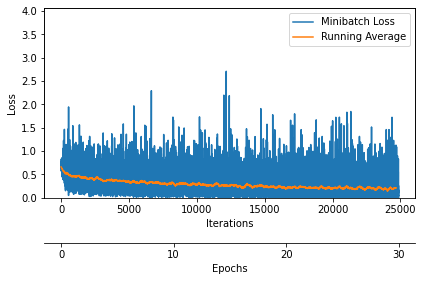

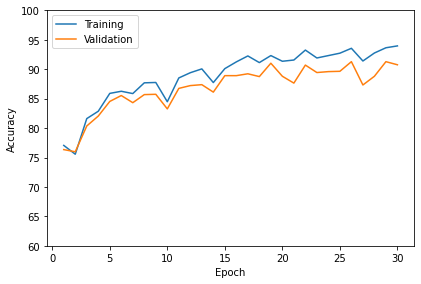

In [ ]:
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/PRML Project/covid 19/weights/m1/vgg16_13_04_only_linear_layers.pth')

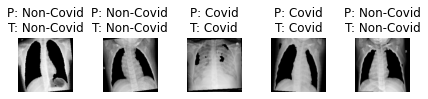

In [ ]:
model.cpu()
# unnormalizer = UnNormalize(mean, std)
class_dict = {0: 'Covid',
              1: 'Non-Covid'}
show_examples(model=model, data_loader=test_loader, unnormalizer=None, class_dict=class_dict)

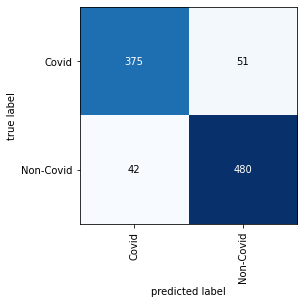

In [ ]:
mat = compute_confusion_matrix(model=model, data_loader=test_loader, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()

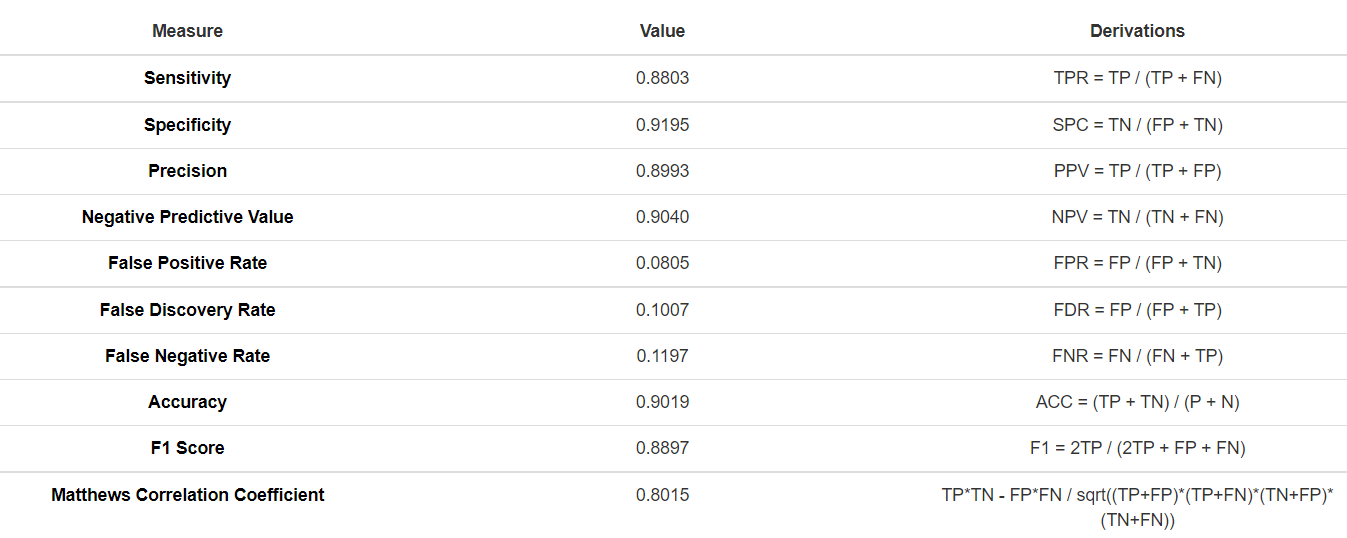

# Dataset Preparation of Random 2500 Images from Covid and Non-Covid Images each (That are found in all raw cxr images, masked Images and Inverse Masked Images)  

2500 noncovid images

In [ ]:
raw_files = list(np.unique(list(os.listdir('/content/drive/MyDrive/PRML Project/covid 19/Extensive COVID-19 X-Ray and CT Chest Images Dataset.zip (Unzipped Files)/COVID-19 Dataset.zip (Unzipped Files)/COVID-19 Dataset/X-ray/Non-COVID/'))))
masked_files = list(np.unique(list(os.listdir('/content/drive/MyDrive/PRML Project/covid 19/masks/Non-Covid/'))))
invmasked_files = list(np.unique(list(os.listdir('/content/drive/MyDrive/PRML Project/covid 19/inverse_masks/Non-Covid/'))))

In [ ]:
len(raw_files), len(masked_files), len(invmasked_files)

In [ ]:
import random
idx = random.sample(range(5428), 2500)

In [ ]:
len(idx)

In [ ]:
k=0
for i in raw_files:
  if (i in masked_files) and (i in invmasked_files):
    k+=1

In [ ]:
k

In [ ]:
files_list = []
k=0
for i in raw_files:
  if (i in masked_files) and (i in invmasked_files):
    files_list.append(i)
    k+=1
  if(k==2500):
    break

In [ ]:
len(files_list)

In [ ]:
import cv2

In [ ]:
for i in files_list:
  raw_img = cv2.imread('/content/drive/MyDrive/PRML Project/covid 19/Extensive COVID-19 X-Ray and CT Chest Images Dataset.zip (Unzipped Files)/COVID-19 Dataset.zip (Unzipped Files)/COVID-19 Dataset/X-ray/Non-COVID/' + i)
  masked_img = cv2.imread('/content/drive/MyDrive/PRML Project/covid 19/masks/Non-Covid/' + i)
  invmasked_img = cv2.imread('/content/drive/MyDrive/PRML Project/covid 19/inverse_masks/Non-Covid/' + i)

  cv2.imwrite('/content/drive/MyDrive/PRML Project/covid 19/Combinedmodel_Dataset/raw_cxr/Non-Covid/' + i, raw_img)    
  cv2.imwrite('/content/drive/MyDrive/PRML Project/covid 19/Combinedmodel_Dataset/masked_cxr/Non-Covid/' + i, masked_img)    
  cv2.imwrite('/content/drive/MyDrive/PRML Project/covid 19/Combinedmodel_Dataset/invmasked_cxr/Non-Covid/' + i, invmasked_img)    

In [ ]:
len(os.listdir('/content/drive/MyDrive/PRML Project/covid 19/Combinedmodel_Dataset/raw_cxr/Non-Covid/'))
len(os.listdir('/content/drive/MyDrive/PRML Project/covid 19/Combinedmodel_Dataset/masked_cxr/Non-Covid/'))
len(os.listdir('/content/drive/MyDrive/PRML Project/covid 19/Combinedmodel_Dataset/invmasked_cxr/Non-Covid/'))

2500 Images for Covid

In [ ]:
import numpy as np
import os
import cv2

In [ ]:
craw_files = list(np.unique(list(os.listdir('/content/drive/MyDrive/PRML Project/covid 19/Extensive COVID-19 X-Ray and CT Chest Images Dataset.zip (Unzipped Files)/COVID-19 Dataset.zip (Unzipped Files)/COVID-19 Dataset/X-ray/COVID/'))))
cmasked_files = list(np.unique(list(os.listdir('/content/drive/MyDrive/PRML Project/covid 19/masks/Covid/'))))
cinvmasked_files = list(np.unique(list(os.listdir('/content/drive/MyDrive/PRML Project/covid 19/inverse_masks/Covid/'))))

In [ ]:
len(craw_files), len(cmasked_files), len(cinvmasked_files)

In [ ]:
k=0
for i in craw_files:
  if (i in cmasked_files) and (i in cinvmasked_files):
    k+=1

In [ ]:
k

In [ ]:
import random
idx = random.sample(range(4044), 2500)

In [ ]:
len(np.unique(idx))

In [ ]:
cfiles_list = []
k=0
for i in craw_files:
  if (i in cmasked_files) and (i in cinvmasked_files):
    cfiles_list.append(i)
    k+=1
  if(k==2500):
    break

In [ ]:
len(cfiles_list)

In [ ]:
for i in cfiles_list:
  craw_img = cv2.imread('/content/drive/MyDrive/PRML Project/covid 19/Extensive COVID-19 X-Ray and CT Chest Images Dataset.zip (Unzipped Files)/COVID-19 Dataset.zip (Unzipped Files)/COVID-19 Dataset/X-ray/COVID/' + i)
  cmasked_img = cv2.imread('/content/drive/MyDrive/PRML Project/covid 19/masks/Covid/' + i)
  cinvmasked_img = cv2.imread('/content/drive/MyDrive/PRML Project/covid 19/inverse_masks/Covid/' + i)

  cv2.imwrite('/content/drive/MyDrive/PRML Project/covid 19/Combinedmodel_Dataset/raw_cxr/Covid/' + i, craw_img)    
  cv2.imwrite('/content/drive/MyDrive/PRML Project/covid 19/Combinedmodel_Dataset/masked_cxr/Covid/' + i, cmasked_img)    
  cv2.imwrite('/content/drive/MyDrive/PRML Project/covid 19/Combinedmodel_Dataset/invmasked_cxr/Covid/' + i, cinvmasked_img)    

In [ ]:
len(os.listdir('/content/drive/MyDrive/PRML Project/covid 19/Combinedmodel_Dataset/raw_cxr/Covid/'))

In [ ]:
len(os.listdir('/content/drive/MyDrive/PRML Project/covid 19/Combinedmodel_Dataset/masked_cxr/Covid/'))

In [ ]:
len(os.listdir('/content/drive/MyDrive/PRML Project/covid 19/Combinedmodel_Dataset/invmasked_cxr/Covid/'))

# Combined MultiModular Model - Works on Inference of Weights from all the 3 Models.

Stored weights of all 3 models are imported.
<br>
Scratch VGG Trained on Raw CXR Images Weights: https://drive.google.com/file/d/1-T1lTIhK7gxWG_PDPOAXjLynfvu1OjJt/view?usp=sharing
<br>
Scratch VGG Trained on Segmented Masked CXR Images Weights: https://drive.google.com/file/d/1-cpFvfabkYdv-PEfiK2e7ZsQsBH2EL4U/view?usp=sharing
<br>
Scratch VGG Trained on Segmented Unmasked CXR Images Weights: https://drive.google.com/drive/folders/1-1MAYrhRC18jqTOAmmW6spI4awChWFC9?usp=sharing

Reason For Training on 5000 Images:


1.   As there were 5500 raw cxr non covid images while 5428 non masked images only.
2.   Due to RAM and Storage constraints on Google Colab.
3.   Due to Time Constraints for training the whole combined Model.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
dataset_path_raw = '/content/drive/MyDrive/PRML Project/covid 19/Combinedmodel_Dataset/raw_cxr/'
dataset_path_masked = '/content/drive/MyDrive/PRML Project/covid 19/Combinedmodel_Dataset/masked_cxr/'
dataset_path_invmasked = '/content/drive/MyDrive/PRML Project/covid 19/Combinedmodel_Dataset/invmasked_cxr/'

In [ ]:
from torchvision.transforms.transforms import RandomHorizontalFlip
dataset_transforms2 = transforms.Compose([
                                          transforms.Resize((224,224)), 
                                          transforms.RandomHorizontalFlip(),
                                          transforms.RandomRotation(10),
                                          transforms.ToTensor(),
                                        ])

In [ ]:
dataset_raw = torchvision.datasets.ImageFolder(root = dataset_path_raw, transform = dataset_transforms2)
dataset_masked = torchvision.datasets.ImageFolder(root = dataset_path_masked, transform = dataset_transforms2)
dataset_invmasked = torchvision.datasets.ImageFolder(root = dataset_path_invmasked, transform = dataset_transforms2)

In [ ]:
batch_size = 4

In [ ]:
len(dataset_raw), len(dataset_masked), len(dataset_invmasked)

(5000, 5000, 5000)

In [ ]:
train_size = int(0.8 * len(dataset_raw))
validation_size = int(0.1 * len(dataset_raw))
test_size = len(dataset_raw) - train_size - validation_size
train_dataset_raw, validation_dataset_raw, test_dataset_raw = torch.utils.data.random_split(dataset_raw, [train_size,validation_size,test_size])

In [ ]:
train_loader_raw = torch.utils.data.DataLoader(dataset = train_dataset_raw, batch_size = batch_size)
valid_loader_raw = torch.utils.data.DataLoader(dataset = validation_dataset_raw, batch_size = batch_size)
test_loader_raw = torch.utils.data.DataLoader(dataset = test_dataset_raw, batch_size = batch_size)

In [ ]:
train_size = int(0.8 * len(dataset_masked))
validation_size = int(0.1 * len(dataset_masked))
test_size = len(dataset_masked) - train_size - validation_size
train_dataset_masked, validation_dataset_masked, test_dataset_masked = torch.utils.data.random_split(dataset_masked, [train_size,validation_size,test_size])

In [ ]:
train_loader_masked = torch.utils.data.DataLoader(dataset = train_dataset_masked, batch_size = batch_size)
valid_loader_masked = torch.utils.data.DataLoader(dataset = validation_dataset_masked, batch_size = batch_size)
test_loader_masked = torch.utils.data.DataLoader(dataset = test_dataset_masked, batch_size = batch_size)

In [ ]:
train_size = int(0.7 * len(dataset_invmasked))
validation_size = int(0.2 * len(dataset_invmasked))
test_size = len(dataset_invmasked) - train_size - validation_size
train_dataset_invmasked, validation_dataset_invmasked, test_dataset_invmasked = torch.utils.data.random_split(dataset_invmasked, [train_size,validation_size,test_size])

In [ ]:
train_loader_invmasked = torch.utils.data.DataLoader(dataset = train_dataset_invmasked, batch_size = batch_size)
valid_loader_invmasked = torch.utils.data.DataLoader(dataset = validation_dataset_invmasked, batch_size = batch_size)
test_loader_invmasked = torch.utils.data.DataLoader(dataset = test_dataset_invmasked, batch_size = batch_size)

In [ ]:
# for (i1, (f1,l1)), (i2, (f2,l2)), (i3, (f3,l3)) in zip(enumerate(train_loader_raw), enumerate(train_loader_masked), enumerate(train_loader_invmasked)):
#   print("----------------")
#   print(i1)
#   print(f1)
#   print("----------------")
#   print(i2)
#   print(f2)
#   print("----------------")
#   print(i3)
#   print(f3)
#   break

In [ ]:
for batch_idx, (features, targets) in enumerate(train_loader_raw):
  print(batch_idx)
  print(features.size())
  print(targets.size())
  print(targets)
  break

0
torch.Size([4, 3, 224, 224])
torch.Size([4])
tensor([1, 0, 0, 0])


In [ ]:
for batch_idx, (features, targets) in enumerate(train_loader_masked):
  print(batch_idx)
  print(features.size())
  print(targets.size())
  print(targets)
  break

In [ ]:
k=0
lis = []
for i, (f,l) in enumerate(train_loader_raw):
  lis.append((i, (f,l)))

In [ ]:
for (batch_idx1, (features1, targets1)), (batch_idx2, (features2,targets2)), (batch_idx3, (features3,targets3)) in zip(enumerate(train_loader_raw), enumerate(train_loader_masked), enumerate(train_loader_invmasked)):
  print(batch_idx1)
  print(features1.size())
  print(targets1.size())
  print(targets1)
  break



0
torch.Size([4, 3, 224, 224])
torch.Size([4])
tensor([0, 0, 0, 0])


In [ ]:
# imports from installed libraries
import os
import numpy as np
import random
import torch
from distutils.version import LooseVersion as Version
from itertools import product

def set_all_seeds(seed):
    os.environ["PL_GLOBAL_SEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)


def set_deterministic(use_tensorcores=False):
    if torch.cuda.is_available():
        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True

    if torch.__version__ <= Version("1.7"):
        torch.set_deterministic(True)
    else:
        torch.use_deterministic_algorithms(True)
        
        # The following are set to True by default and allow cards
        # like the Ampere and newer to utilize tensorcores for
        # convolutions and matrix multiplications, which can result
        # in a significant speed-up. However, results may differ compared
        # to card how don't use mixed precision via tensor cores.
        torch.backends.cuda.matmul.allow_tf32 = use_tensorcores
        torch.backends.cudnn.allow_tf32 = use_tensorcores


def compute_accuracy(model, data_loader_raw, data_loader_masked, data_loader_invmasked, device):

    with torch.no_grad():

        correct_pred, num_examples = 0, 0

        for (i1, (features1, targets1)), (i2, (features2,targets2)), (i3, (features3,targets3)) in zip(enumerate(train_loader_raw), enumerate(train_loader_masked), enumerate(train_loader_invmasked)):

            i = i1
            features1 = features1.to(device)
            features2 = features2.to(device)
            features3 = features3.to(device)
            targets = targets1.float().to(device)

            logits = model(features1, features2, features3)
            _, predicted_labels = torch.max(logits, 1)

            num_examples += targets.size(0)
            correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100


def compute_confusion_matrix(model, data_loader_raw, data_loader_masked, data_loader_invmasked, device):

    all_targets, all_predictions = [], []
    with torch.no_grad():

        for (i1, (features1, targets1)), (i2, (features2,targets2)), (i3, (features3,targets3)) in zip(enumerate(train_loader_raw), enumerate(train_loader_masked), enumerate(train_loader_invmasked)):
            i = i1
            features1 = features1.to(device)
            features2 = features2.to(device)
            features3 = features3.to(device)
            targets = targets1
            logits = model(features1, features2, features3)
            _, predicted_labels = torch.max(logits, 1)
            all_targets.extend(targets.to('cpu'))
            all_predictions.extend(predicted_labels.to('cpu'))

    all_predictions = all_predictions
    all_predictions = np.array(all_predictions)
    all_targets = np.array(all_targets)
        
    class_labels = np.unique(np.concatenate((all_targets, all_predictions)))
    if class_labels.shape[0] == 1:
        if class_labels[0] != 0:
            class_labels = np.array([0, class_labels[0]])
        else:
            class_labels = np.array([class_labels[0], 1])
    n_labels = class_labels.shape[0]
    lst = []
    z = list(zip(all_targets, all_predictions))
    for combi in product(class_labels, repeat=2):
        lst.append(z.count(combi))
    mat = np.asarray(lst)[:, None].reshape(n_labels, n_labels)
    return mat

In [ ]:
import time
import torch

def train_model(model, num_epochs, train_loader_raw,
                valid_loader_raw, test_loader_raw, train_loader_masked,
                valid_loader_masked, test_loader_masked, train_loader_invmasked,
                valid_loader_invmasked, test_loader_invmasked, optimizer,
                device, logging_interval=50,
                scheduler=None,
                scheduler_on='valid_acc'):

    start_time = time.time()
    minibatch_loss_list, train_acc_list, valid_acc_list = [], [], []
    
    best_acc = 0
    for epoch in range(num_epochs):

        model.train()
        for (batch_idx1, (features1, targets1)), (batch_idx2, (features2,targets2)), (batch_idx3, (features3,targets3)) in zip(enumerate(train_loader_raw), enumerate(train_loader_masked), enumerate(train_loader_invmasked)):
            
            # batch_idx1, batch_idx2, and batch_idx3 are all same.
            batch_idx = batch_idx1
            features1 = features1.to(device)
            features2 = features2.to(device)
            features3 = features3.to(device)
            # targets1, targets2, and target3 are all same.
            targets = targets1.to(device)

            # ## FORWARD AND BACK PROP
            logits = model(features1, features2, features3)
            loss = torch.nn.functional.cross_entropy(logits, targets)
            optimizer.zero_grad()

            loss.backward()

            # ## UPDATE MODEL PARAMETERS
            optimizer.step()

            # ## LOGGING
            minibatch_loss_list.append(loss.item())
            if not batch_idx % logging_interval:
                print(f'Epoch: {epoch+1:03d}/{num_epochs:03d} '
                      f'| Batch {batch_idx:04d}/{len(train_loader_raw):04d} '
                      f'| Loss: {loss:.4f}')

        model.eval()
        with torch.no_grad():  # save memory during inference
            train_acc = compute_accuracy(model, train_loader_raw, train_loader_masked, train_loader_invmasked, device=device)
            valid_acc = compute_accuracy(model, valid_loader_raw, valid_loader_masked, valid_loader_invmasked, device=device)
            print(f'Epoch: {epoch+1:03d}/{num_epochs:03d} '
                  f'| Train: {train_acc :.2f}% '
                  f'| Validation: {valid_acc :.2f}%')
            train_acc_list.append(train_acc.item())
            valid_acc_list.append(valid_acc.item())

        if(valid_acc.item() > best_acc):
          best_acc = valid_acc.item()
          torch.save(model.state_dict(), f'/content/drive/MyDrive/PRML Project/covid 19/M4_weights/m4_02_05_{valid_acc.item()}.pt')

        elapsed = (time.time() - start_time)/60
        print(f'Time elapsed: {elapsed:.2f} min')
        
        if scheduler is not None:

            if scheduler_on == 'valid_acc':
                scheduler.step(valid_acc_list[-1])
            elif scheduler_on == 'minibatch_loss':
                scheduler.step(minibatch_loss_list[-1])
            else:
                raise ValueError(f'Invalid `scheduler_on` choice.')
        

    elapsed = (time.time() - start_time)/60
    print(f'Total Training Time: {elapsed:.2f} min')

    test_acc = compute_accuracy(model, test_loader_raw, test_loader_masked, test_loader_invmasked, device=device)
    print(f'Test accuracy {test_acc :.2f}%')

    return minibatch_loss_list, train_acc_list, valid_acc_list

In [ ]:
# imports from installed libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import torch


def plot_training_loss(minibatch_loss_list, num_epochs, iter_per_epoch,
                       results_dir=None, averaging_iterations=100):

    plt.figure()
    ax1 = plt.subplot(1, 1, 1)
    ax1.plot(range(len(minibatch_loss_list)),
             (minibatch_loss_list), label='Minibatch Loss')

    if len(minibatch_loss_list) > 1000:
        ax1.set_ylim([
            0, np.max(minibatch_loss_list[1000:])*1.5
            ])
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Loss')

    ax1.plot(np.convolve(minibatch_loss_list,
                         np.ones(averaging_iterations,)/averaging_iterations,
                         mode='valid'),
             label='Running Average')
    ax1.legend()

    ###################
    # Set scond x-axis
    ax2 = ax1.twiny()
    newlabel = list(range(num_epochs+1))

    newpos = [e*iter_per_epoch for e in newlabel]

    ax2.set_xticks(newpos[::10])
    ax2.set_xticklabels(newlabel[::10])

    ax2.xaxis.set_ticks_position('bottom')
    ax2.xaxis.set_label_position('bottom')
    ax2.spines['bottom'].set_position(('outward', 45))
    ax2.set_xlabel('Epochs')
    ax2.set_xlim(ax1.get_xlim())
    ###################

    plt.tight_layout()

    if results_dir is not None:
        image_path = os.path.join(results_dir, 'plot_training_loss.pdf')
        plt.savefig(image_path)


def plot_accuracy(train_acc_list, valid_acc_list, results_dir):

    num_epochs = len(train_acc_list)

    plt.plot(np.arange(1, num_epochs+1),
             train_acc_list, label='Training')
    plt.plot(np.arange(1, num_epochs+1),
             valid_acc_list, label='Validation')

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()

    if results_dir is not None:
        image_path = os.path.join(
            results_dir, 'plot_acc_training_validation.pdf')
        plt.savefig(image_path)


def show_examples(model, data_loader, unnormalizer=None, class_dict=None):
    
        
    for batch_idx, (features, targets) in enumerate(data_loader):

        with torch.no_grad():
            features = features
            targets = targets
            logits = model(features)
            predictions = torch.argmax(logits, dim=1)
        break

    fig, axes = plt.subplots(nrows=1, ncols=5,
                             sharex=True, sharey=True)
    
    if unnormalizer is not None:
        for idx in range(features.shape[0]):
            features[idx] = unnormalizer(features[idx])
    nhwc_img = np.transpose(features, axes=(0, 2, 3, 1))
    
    if nhwc_img.shape[-1] == 1:
        nhw_img = np.squeeze(nhwc_img.numpy(), axis=3)

        for idx, ax in enumerate(axes.ravel()):
            ax.imshow(nhw_img[idx], cmap='binary')
            if class_dict is not None:
                ax.title.set_text(f'P: {class_dict[predictions[idx].item()]}'
                                  f'\nT: {class_dict[targets[idx].item()]}')
            else:
                ax.title.set_text(f'P: {predictions[idx]} | T: {targets[idx]}')
            ax.axison = False

    else:

        for idx, ax in enumerate(axes.ravel()):
            ax.imshow(nhwc_img[idx])
            if class_dict is not None:
                ax.title.set_text(f'P: {class_dict[predictions[idx].item()]}'
                                  f'\nT: {class_dict[targets[idx].item()]}')
            else:
                ax.title.set_text(f'P: {predictions[idx]} | T: {targets[idx]}')
            ax.axison = False
    plt.tight_layout()
    plt.show()


def plot_confusion_matrix(conf_mat,
                          hide_spines=False,
                          hide_ticks=False,
                          figsize=None,
                          cmap=None,
                          colorbar=False,
                          show_absolute=True,
                          show_normed=False,
                          class_names=None):

    if not (show_absolute or show_normed):
        raise AssertionError('Both show_absolute and show_normed are False')
    if class_names is not None and len(class_names) != len(conf_mat):
        raise AssertionError('len(class_names) should be equal to number of'
                             'classes in the dataset')

    total_samples = conf_mat.sum(axis=1)[:, np.newaxis]
    normed_conf_mat = conf_mat.astype('float') / total_samples

    fig, ax = plt.subplots(figsize=figsize)
    ax.grid(False)
    if cmap is None:
        cmap = plt.cm.Blues

    if figsize is None:
        figsize = (len(conf_mat)*1.25, len(conf_mat)*1.25)

    if show_normed:
        matshow = ax.matshow(normed_conf_mat, cmap=cmap)
    else:
        matshow = ax.matshow(conf_mat, cmap=cmap)

    if colorbar:
        fig.colorbar(matshow)

    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            cell_text = ""
            if show_absolute:
                cell_text += format(conf_mat[i, j], 'd')
                if show_normed:
                    cell_text += "\n" + '('
                    cell_text += format(normed_conf_mat[i, j], '.2f') + ')'
            else:
                cell_text += format(normed_conf_mat[i, j], '.2f')
            ax.text(x=j,
                    y=i,
                    s=cell_text,
                    va='center',
                    ha='center',
                    color="white" if normed_conf_mat[i, j] > 0.5 else "black")
    
    if class_names is not None:
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names, rotation=90)
        plt.yticks(tick_marks, class_names)
        
    if hide_spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    if hide_ticks:
        ax.axes.get_yaxis().set_ticks([])
        ax.axes.get_xaxis().set_ticks([])

    plt.xlabel('predicted label')
    plt.ylabel('true label')
    return fig, ax

In [ ]:
import torch
from torch.utils.data import sampler
from torchvision import datasets
from torch.utils.data import DataLoader
from torch.utils.data import SubsetRandomSampler
from torchvision import transforms


class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        """
        Parameters:
        ------------
        tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        
        Returns:
        ------------
        Tensor: Normalized image.
        """
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
        return tensor

In [ ]:
import torch
from torch import nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
RANDOM_SEED = 123
BATCH_SIZE = 8
NUM_EPOCHS = 40
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
set_all_seeds(RANDOM_SEED)
#set_deterministic()

In [ ]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
class scratch_vgg19(nn.Module):
	#  Determine what layers and their order in CNN object 
    def __init__(self):
        super(scratch_vgg19, self).__init__()
        self.conv_layer1 = nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.relu1 = nn.ReLU()
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_layer2 = nn.Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.relu2 = nn.ReLU()
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_layer3 = nn.Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.relu3 = nn.ReLU()
        self.max_pool3 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.conv_layer4 = nn.Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.relu4 = nn.ReLU()
        self.max_pool4 = nn.MaxPool2d(kernel_size = 2, stride = 2)

        self.flat = nn.Flatten()
        self.fc1 = nn.Linear(100352, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 2)
    
    def forward(self, x):

        out = self.conv_layer1(x)
        out = self.relu1(out)
        out = self.max_pool1(out)

        out = self.conv_layer2(out)
        out = self.relu2(out)
        out = self.max_pool2(out)
                
        out = self.conv_layer3(out)
        out = self.relu3(out)
        out = self.max_pool3(out)
        
        out = self.conv_layer4(out)
        out = self.relu4(out)
        out = self.max_pool4(out)
        
        out = self.flat(out)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)

        return out

In [ ]:
model_raw = scratch_vgg19()
model_raw.load_state_dict(torch.load('/content/drive/MyDrive/PRML Project/covid 19/Weights_full_training/vgg19_full_30_04_93.34032440185547.pt')) # saurabh
model_raw.to(DEVICE)

model_mask = scratch_vgg19()
model_mask.load_state_dict(torch.load('/content/drive/MyDrive/PRML Project/covid 19/Unet_M2_weights/vgg19_full_unetmask_01_05_87.2756118774414.pt')) # mitarth
model_mask.to(DEVICE)

model_inv_mask = scratch_vgg19()
model_inv_mask.load_state_dict(torch.load('/content/drive/MyDrive/PRML Project/covid 19/Unet_M3_weights/vgg19_full_unetinvmask_01_05_91.28828430175781.pt')) # mukul
model_inv_mask.to(DEVICE)

scratch_vgg19(
  (conv_layer1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (max_pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu4): ReLU()
  (max_pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=100352, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_featur

In [ ]:
# code to do the finetuning on the inference weights
# torch.grad() types
# reference
# https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html

In [ ]:
import torch.nn as nn
import torch

class CombinedModelM4(nn.Module):
  def __init__(self, model_raw, model_mask, model_inv_mask):
    super().__init__()
    # Note that the last layer for classification should be removed in both the models

    # self.rawvgg = model_raw[:-4]
    self.rawvgg  = nn.Sequential(*list(model_raw.children())[:-3])
    self.maskvgg = nn.Sequential(*list(model_mask.children())[:-3])
    self.invmaskvgg = nn.Sequential(*list(model_inv_mask.children())[:-3])

    self.classifier = nn.Sequential(
                                                  nn.Linear(in_features = 301056, out_features = 4096, bias = True),
                                                  nn.ReLU(inplace = True),
                                                  nn.Linear(in_features = 4096, out_features = 4096, bias = True),
                                                  nn.ReLU(inplace=True),
                                                  nn.Linear(in_features = 4096, out_features = 2, bias = True),
                                              )
    
  def forward(self, cxr_raw,cxr_mask, cxr_inv):

    rawvgg = self.rawvgg(cxr_raw).view(cxr_raw.shape[0], -1)
    maskvgg = self.maskvgg(cxr_mask).view(cxr_mask.shape[0], -1)
    inv_maskvgg = self.invmaskvgg(cxr_inv).view(cxr_inv.shape[0], -1)

    combined_ft = torch.cat([rawvgg, maskvgg, inv_maskvgg], axis = -1)

    out = self.classifier(combined_ft)

    return out

In [ ]:
model = CombinedModelM4(model_raw, model_mask, model_inv_mask)
model

CombinedModelM4(
  (rawvgg): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
  )
  (maskvgg): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3)

In [ ]:
# all False and then unfreeze classifier layers
for param in model.parameters():
  param.requires_grad = False
  
model.classifier.requires_grad = True

In [ ]:
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader_raw=train_loader_raw,
    valid_loader_raw=valid_loader_raw,
    test_loader_raw=test_loader_raw,
    train_loader_masked=train_loader_masked,
    valid_loader_masked=valid_loader_masked,
    test_loader_masked=test_loader_masked,
    train_loader_invmasked=train_loader_invmasked,
    valid_loader_invmasked=valid_loader_invmasked,
    test_loader_invmasked=test_loader_invmasked,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader_raw),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/PRML Project/covid 19/M4_weights/m4_02_05_final.pth')

In [ ]:
model.cpu()
# unnormalizer = UnNormalize(mean, std)
class_dict = {0: 'Covid',
              1: 'Non-Covid'}
show_examples(model=model, data_loader=test_loader_raw, unnormalizer=None, class_dict=class_dict)

In [ ]:
mat = compute_confusion_matrix(model=model, data_loader=test_loader_raw, device=torch.device('cpu'))
plot_confusion_matrix(mat, class_names=class_dict.values())
plt.show()

Combined Model Couldn't got run due to insufficient GPU resources

Expected Accuracy of Combined Multimodular Model is 97%